In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.set_option('display.max_columns', None)

In [ ]:
from IPython.display import display

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/42_PRESENTATIONS FINALES PROJET PROMOTION DEC 2020/datasets/NBAGAMES.csv", sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (58,64,65,68,79,93,96,114) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62448 entries, 0 to 62447
Columns: 149 entries, GAME_ID to HISTORICAL_STATUS
dtypes: float64(100), int64(16), object(33)
memory usage: 71.0+ MB


In [ ]:
df.head()

GAME_ID  SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME  \
0  24600001      21946    1610610035                    HUS   
1  24600003      21946    1610610034                    BOM   
2  24600004      21946    1610610025                    CHS   
3  24600002      21946    1610610032                    PRO   
4  24600005      21946    1610610028                    DEF   

            TEAM_NAME_HOME   GAME_DATE MATCHUP_HOME WL_HOME  MIN_HOME  \
0          Toronto Huskies  1946-11-01  HUS vs. NYK       L         0   
1        St. Louis Bombers  1946-11-02  BOM vs. PIT       W         0   
2            Chicago Stags  1946-11-02  CHS vs. NYK       W         0   
3  Providence Steamrollers  1946-11-02  PRO vs. BOS       W         0   
4          Detroit Falcons  1946-11-02  DEF vs. WAS       L         0   

   FGM_HOME  FGA_HOME  FG_PCT_HOME  FG3M_HOME  FG3A_HOME  FG3_PCT_HOME  \
0      25.0       NaN          NaN        NaN        NaN           NaN   
1      20.0      59.0        0.339        NaN        NaN           NaN   
2      21.0       NaN          NaN        NaN        NaN           NaN   
3      21.0       NaN          NaN        NaN        NaN           NaN   
4      10.0       NaN          NaN        NaN        NaN           NaN   

   FTM_HOME  FTA_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  REB_HOME  AST_HOME  \
0      16.0      29.0        0.552        NaN        NaN       NaN       NaN   
1      16.0       NaN          NaN        NaN        NaN       NaN       NaN   
2      21.0       NaN          NaN        NaN        NaN       NaN       NaN   
3      17.0       NaN          NaN        NaN        NaN       NaN       NaN   
4      13.0       NaN          NaN        NaN        NaN       NaN       NaN   

   STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  PLUS_MINUS_HOME  \
0       NaN       NaN       NaN      NaN        66               -2   
1       NaN       NaN       NaN     21.0        56                5   
2       NaN       NaN       NaN     20.0        63               16   
3       NaN       NaN       NaN      NaN        59                6   
4       NaN       NaN       NaN      NaN        33              -17   

   VIDEO_AVAILABLE_HOME  TEAM_ID_AWAY TEAM_ABBREVIATION_AWAY  \
0                     0    1610612752                    NYK   
1                     0    1610610031                    PIT   
2                     0    1610612752                    NYK   
3                     0    1610612738                    BOS   
4                     0    1610610036                    WAS   

        TEAM_NAME_AWAY MATCHUP_AWAY WL_AWAY  MIN_AWAY  FGM_AWAY  FGA_AWAY  \
0      New York Knicks    NYK @ HUS       W         0      24.0       NaN   
1   Pittsburgh Ironmen    PIT @ BOM       L         0      16.0      72.0   
2      New York Knicks    NYK @ CHS       L         0      16.0       NaN   
3       Boston Celtics    BOS @ PRO       L         0      21.0       NaN   
4  Washington Capitols    WAS @ DEF       W         0      18.0       NaN   

   FG_PCT_AWAY  FG3M_AWAY  FG3A_AWAY  FG3_PCT_AWAY  FTM_AWAY  FTA_AWAY  \
0          NaN        NaN        NaN           NaN      20.0      26.0   
1        0.222        NaN        NaN           NaN      19.0       NaN   
2          NaN        NaN        NaN           NaN      15.0       NaN   
3          NaN        NaN        NaN           NaN      11.0       NaN   
4          NaN        NaN        NaN           NaN      14.0       NaN   

   FT_PCT_AWAY  OREB_AWAY  DREB_AWAY  REB_AWAY  AST_AWAY  STL_AWAY  BLK_AWAY  \
0        0.769        NaN        NaN       NaN       NaN       NaN       NaN   
1          NaN        NaN        NaN       NaN       NaN       NaN       NaN   
2          NaN        NaN        NaN       NaN       NaN       NaN       NaN   
3          NaN        NaN        NaN       NaN       NaN       NaN       NaN   
4          NaN        NaN        NaN       NaN       NaN       NaN       NaN   

   TOV_AWAY  PF_AWAY  PTS_AWAY  PLUS_MINUS_AWAY  VIDEO_AVAI

In [ ]:
df.sample(10)

GAME_ID  SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME  \
180    24600180      21946    1610610036                    WAS   
57152  21600549      22016    1610612747                    LAL   
48526  20900342      22009    1610612760                    OKC   
49066  20900884      22009    1610612758                    SAC   
33681  29600694      21996    1610612766                    CHH   
12477  27500240      21975    1610612764                    WAS   
45715  20601228      22006    1610612757                    POR   
29064  29200592      21992    1610612743                    DEN   
46564  20700838      22007    1610612748                    MIA   
26289  29000030      21990    1610612745                    HOU   

               TEAM_NAME_HOME   GAME_DATE MATCHUP_HOME WL_HOME  MIN_HOME  \
180       Washington Capitols  1947-01-25  WAS vs. PIT       W         0   
57152      Los Angeles Lakers  2017-01-06  LAL vs. MIA       W       240   
48526   Oklahoma City Thunder  2009-12-13  OKC vs. CLE       L       240   
49066        Sacramento Kings  2010-02-28  SAC vs. LAC       W       240   
33681       Charlotte Hornets  1997-02-12  CHH vs. NJN       W       240   
12477      Washington Bullets  1975-12-20  WAS vs. DET       W       240   
45715  Portland Trail Blazers  2007-04-18  POR vs. GSW       L       240   
29064          Denver Nuggets  1993-02-06  DEN vs. DAL       W       240   
46564              Miami Heat  2008-02-26  MIA vs. SAC       W       240   
26289         Houston Rockets  1990-11-06  HOU vs. DEN       W       240   

       FGM_HOME  FGA_HOME  FG_PCT_HOME  FG3M_HOME  FG3A_HOME  FG3_PCT_HOME  \
180        34.0       NaN          NaN        NaN        NaN           NaN   
57152      48.0      96.0        0.500       10.0       28.0         0.357   
48526      30.0      69.0        0.435        4.0       16.0         0.250   
49066      38.0      88.0        0.432        5.0       14.0         0.357   
33681      46.0      87.0        0.529        5.0       20.0         0.250   
12477      42.0       NaN          NaN        NaN        NaN           NaN   
45715      33.0      77.0        0.429        2.0       14.0         0.143   
29064      33.0      75.0        0.440        1.0        4.0         0.250   
46564      39.0      75.0        0.520        5.0       11.0         0.455   
26289      51.0     102.0        0.500        6.0       10.0         0.600   

       FTM_HOME  FTA_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  REB_HOME  \
180        16.0       NaN          NaN        NaN        NaN       NaN   
57152      21.0      29.0        0.724       18.0       44.0      62.0   
48526      25.0      29.0        0.862        6.0       30.0      36.0   
49066      16.0      24.0        0.667       11.0       32.0      43.0   
33681      16.0      18.0        0.889       12.0       33.0      45.0   
12477      14.0      17.0        0.824        NaN        NaN       NaN   
45715      30.0      34.0        0.882        9.0       30.0      39.0   
29064      44.0      57.0        0.772       11.0       29.0      40.0   
46564      24.0      32.0        0.750        8.0       32.0      40.0   
26289      37.0      48.0        0.771       16.0       50.0      66.0   

       AST_HOME  STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  \
180         NaN       NaN       NaN       NaN     22.0        84   
57152      22.0       6.0       2.0      13.0     22.0       127   
48526      14.0       7.0       4.0      16.0     17.0        89   
49066      17.0       9.0       5.0      10.0     23.0        97   
33681      33.0       4.0      13.0      14.0     21.0       113   
12477       NaN       NaN       NaN       NaN     20.0        98   
45715      22.0       8.0       2.0      19.0     19.0        98   
29064      10.0      14.0       3.0      19.0     17.0       111   
46564      27.0       9.0       8.0      15.0     20.0       107   
26289      34.0       6.0       7.0      28.0     21.0       145   

       PLU

In [ ]:
print(df.TEAM_NAME_HOME.unique)

<bound method Series.unique of 0                Toronto Huskies
1              St. Louis Bombers
2                  Chicago Stags
3        Providence Steamrollers
4                Detroit Falcons
                  ...           
62443     Portland Trail Blazers
62444     Minnesota Timberwolves
62445              Chicago Bulls
62446       New Orleans Pelicans
62447           Sacramento Kings
Name: TEAM_NAME_HOME, Length: 62448, dtype: object>


In [ ]:
# Separation des colonnes object et numeric
object_column=[col for col in df.columns if df[col].dtype=='object']
len(object_column)

33

In [ ]:
object_nunique=list(map(lambda col : df[col].nunique(),object_column))
a = dict(zip(object_column,object_nunique))
sorted (a.items(), key=lambda x : x[1])

[('WL_HOME', 2),
 ('WL_AWAY', 2),
 ('GAME_STATUS_TEXT', 11),
 ('NATL_TV_BROADCASTER_ABBREVIATION', 15),
 ('LIVE_PC_TIME', 33),
 ('TEAM_CITY_HOME', 34),
 ('TEAM_CITY_AWAY', 34),
 ('TEAM_NICKNAME_HOME', 50),
 ('TEAM_NICKNAME_AWAY', 50),
 ('LAST_GAME_HOME_TEAM_NAME', 50),
 ('LAST_GAME_VISITOR_TEAM_NAME', 50),
 ('TEAM_CITY_NAME_HOME', 54),
 ('TEAM_CITY_NAME_AWAY', 54),
 ('LAST_GAME_HOME_TEAM_CITY', 54),
 ('LAST_GAME_VISITOR_TEAM_CITY', 54),
 ('SERIES_LEADER', 56),
 ('TEAM_NAME_HOME', 72),
 ('TEAM_NAME_AWAY', 72),
 ('TEAM_ABBREVIATION_HOME', 74),
 ('TEAM_ABBREVIATION_AWAY', 74),
 ('LAST_GAME_HOME_TEAM_ABBREVIATION', 74),
 ('LAST_GAME_VISITOR_TEAM_CITY1', 74),
 ('LIVE_PERIOD_TIME_BCAST', 80),
 ('GAME_TIME', 139),
 ('MATCHUP_HOME', 2269),
 ('MATCHUP_AWAY', 2269),
 ('TEAM_WINS_LOSSES_AWAY', 2502),
 ('TEAM_WINS_LOSSES_HOME', 2507),
 ('GAME_DATE', 11015),
 ('GAME_DATE_DAY', 11016),
 ('GAME_DATE_EST', 11034),
 ('LAST_GAME_DATE_EST', 11906),
 ('GAMECODE', 62379)]

In [ ]:
print(df.GAME_STATUS_TEXT.value_counts())

Final                   30609
8:00 pm ET                109
3rd Qtr                    23
End of 3rd Qtr              8
4th Qtr                     6
7:00 pm ET                  5
Final                       4
1st Qtr                     1
Halftime                    1
2nd Qtr                     1
1st Qtr                     1
Name: GAME_STATUS_TEXT, dtype: int64


In [ ]:
print(df.TEAM_CITY_HOME.value_counts()) #54

Los Angeles                  1745
Phoenix                       994
Dallas                        993
Denver                        992
Portland                      991
Washington                    991
Cleveland                     991
Houston                       991
Toronto                       991
Miami                         991
Sacramento                    990
Orlando                       990
Milwaukee                     990
Indiana                       990
Boston                        990
Utah                          990
Philadelphia                  990
Chicago                       989
Atlanta                       989
Golden State                  989
San Antonio                   989
New York                      988
Detroit                       988
Minnesota                     987
Charlotte                     904
Memphis                       803
New Orleans                   679
New Jersey                    632
Oklahoma City                 516
Seattle       

In [ ]:
print(df.TEAM_NAME_HOME.value_counts())  #74


Boston Celtics        2935
New York Knicks       2922
Detroit Pistons       2553
Los Angeles Lakers    2475
Philadelphia 76ers    2340
                      ... 
Detroit Falcons         30
Toronto Huskies         30
Pittsburgh Ironmen      30
Cleveland Rebels        30
Indianapolis Jets       29
Name: TEAM_NAME_HOME, Length: 72, dtype: int64


In [ ]:
# numeric columns identification

In [ ]:
num_column=[col for col in df.columns if df[col].dtype in ['int64','float64']]
len(num_column)

116

In [ ]:
df.describe()

GAME_ID     SEASON_ID  TEAM_ID_HOME      MIN_HOME      FGM_HOME  \
count  6.244800e+04  62448.000000  6.244800e+04  62448.000000  62430.000000   
mean   2.513506e+07  21991.655874  1.610613e+09    218.888147     39.956816   
std    3.594942e+06     18.970710  3.553851e+02     70.834923      6.799560   
min    2.000000e+07  21946.000000  1.610610e+09      0.000000      4.000000   
25%    2.130002e+07  21978.000000  1.610613e+09    240.000000     35.000000   
50%    2.640011e+07  21994.000000  1.610613e+09    240.000000     40.000000   
75%    2.850037e+07  22007.000000  1.610613e+09    240.000000     44.000000   
max    2.990119e+07  22020.000000  1.610613e+09    365.000000     72.000000   

           FGA_HOME   FG_PCT_HOME     FG3M_HOME     FG3A_HOME  FG3_PCT_HOME  \
count  44586.000000  44548.000000  46791.000000  41527.000000  41142.000000   
mean      83.900305      0.467941      5.321152     16.547018      0.346580   
std        9.135863      0.063452      4.225780      9.617828      0.154537   
min        0.000000      0.140000      0.000000      0.000000      0.000000   
25%       78.000000      0.427000      2.000000      9.000000      0.258000   
50%       83.000000      0.467000      5.000000     15.000000      0.348000   
75%       89.000000      0.507000      8.000000     22.000000      0.438000   
max      240.000000      5.125000     28.000000     70.000000      1.000000   

           FTM_HOME      FTA_HOME   FT_PCT_HOME     OREB_HOME     DREB_HOME  \
count  62427.000000  59412.000000  59409.000000  41240.000000  41171.000000   
mean      20.841479     27.359153      0.754420     12.228952     31.214690   
std        7.182259      8.918174      0.098285      4.440478      5.564032   
min        0.000000      0.000000      0.000000      0.000000      6.000000   
25%       16.000000     21.000000      0.692000      9.000000     27.000000   
50%       20.000000     27.000000      0.760000     12.000000     31.000000   
75%       25.000000     33.000000      0.821000     15.000000     35.000000   
max       61.000000     86.000000      4.167000     37.000000     55.000000   

           REB_HOME      AST_HOME      STL_HOME      BLK_HOME      TOV_HOME  \
count  44340.000000  44204.000000  41323.000000  41532.000000  41503.000000   
mean      43.733897     23.946498      8.007720      5.351151     14.779606   
std        7.201578      5.692134      3.112862      2.794964      4.084156   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       39.000000     20.000000      6.000000      3.000000     12.000000   
50%       43.000000     24.000000      8.000000      5.000000     15.000000   
75%       48.000000     28.000000     10.000000      7.000000     17.000000   
max       95.000000     52.000000     27.000000     23.000000     39.000000   

            PF_HOME      PTS_HOME  PLUS_MINUS_HOME  VIDEO_AVAILABLE_HOME  \
count  59512.000000  62448.000000     62448.000000          62448.000000   
mean      22.464293    104.744011         3.704250              0.173632   
std        5.017276     14.747103        12.985782              0.384836   
min        0.000000     18.000000       -57.000000              0.000000   
25%       19.000000     95.000000        -5.000000              0.000000   
50%       22.000000    105.000000         4.000000              0.000000   
75%       26.000000    114.000000        12.000000              0.000000   
max      107.000000    184.000000        68.000000              2.000000   

       TEAM_ID_AWAY      MIN_AWAY      FGM_AWAY      FGA_AWAY   FG_PCT_AWAY  \
count  6.244800e+04  62448.000000  62433.000000  44587.000000  44550.000000   
mean   1.610613e+09    218.887715     38.591242     83.669545      0.455125   
std    3.586082e+02     70.835764      6.487174      9.070819      0.057930   
min    1.610610e+09      0.000000      4.000000      0.000000      0.164000   
25%    1.610613e+09    240.000000     34.000000     78.000000      0.417000   
50%  

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62448 entries, 0 to 62447
Columns: 149 entries, GAME_ID to HISTORICAL_STATUS
dtypes: float64(100), int64(16), object(33)
memory usage: 71.0+ MB


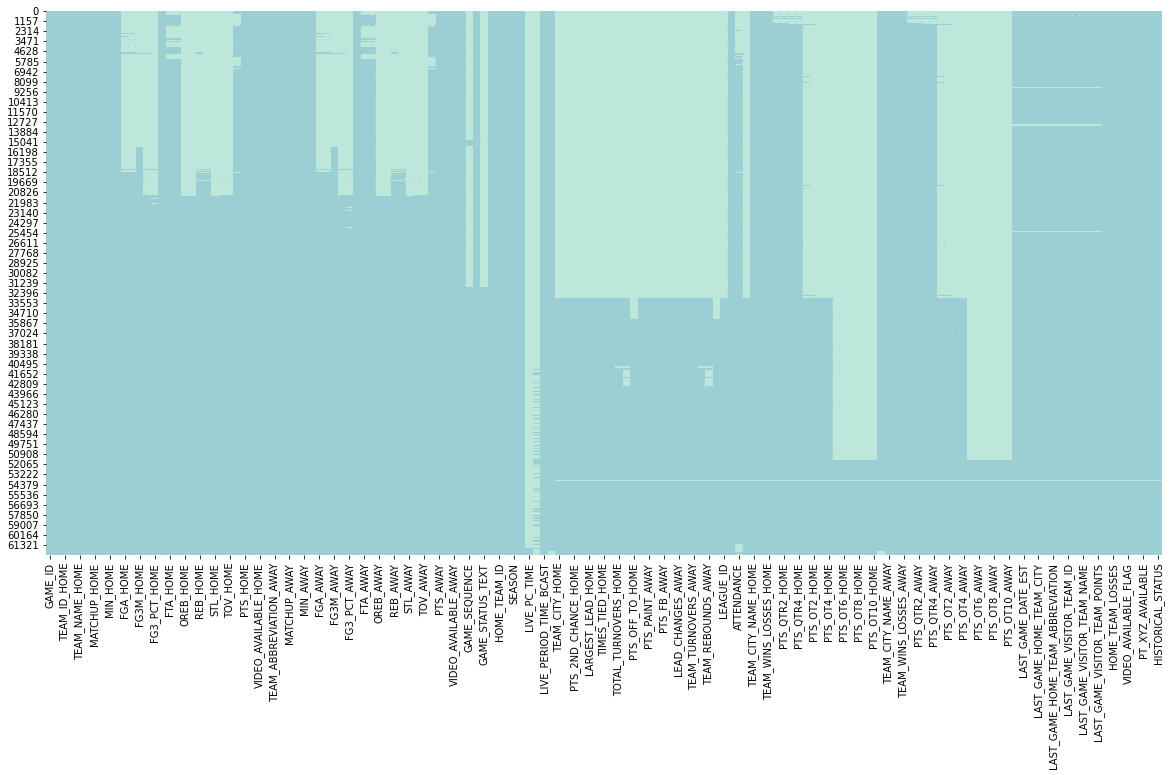

In [ ]:
# cartographies des données manquantes X_train heatmap
plt.figure(figsize=(20,10))

sns.color_palette("crest", as_cmap=True)
sns.heatmap(df.notna(), cmap="icefire", center = 10.0, cbar=False);

# 1eres observations
## -> Bcp de critères non renseignés au début du dataset 1946 & sont renseignés par la suite, cela doit correspondre à de nouveaux suivis statistiques qui apparaissent avec le temps

In [ ]:
# liste détaillée des NaN
df.isna().sum()

GAME_ID                                 0
SEASON_ID                               0
TEAM_ID_HOME                            0
TEAM_ABBREVIATION_HOME                  0
TEAM_NAME_HOME                          0
GAME_DATE                               0
MATCHUP_HOME                            0
WL_HOME                                40
MIN_HOME                                0
FGM_HOME                               18
FGA_HOME                            17862
FG_PCT_HOME                         17900
FG3M_HOME                           15657
FG3A_HOME                           20921
FG3_PCT_HOME                        21306
FTM_HOME                               21
FTA_HOME                             3036
FT_PCT_HOME                          3039
OREB_HOME                           21208
DREB_HOME                           21277
REB_HOME                            18108
AST_HOME                            18244
STL_HOME                            21125
BLK_HOME                          

In [ ]:
# CALCUL % VALEURS MANQUANTES
a = np.round((df.isna().sum()/len(df))*100,2)

In [ ]:
df2=pd.DataFrame(a, columns=['%NaN données brutes'])
df2

%NaN données brutes
GAME_ID                                          0.00
SEASON_ID                                        0.00
TEAM_ID_HOME                                     0.00
TEAM_ABBREVIATION_HOME                           0.00
TEAM_NAME_HOME                                   0.00
GAME_DATE                                        0.00
MATCHUP_HOME                                     0.00
WL_HOME                                          0.06
MIN_HOME                                         0.00
FGM_HOME                                         0.03
FGA_HOME                                        28.60
FG_PCT_HOME                                     28.66
FG3M_HOME                                       25.07
FG3A_HOME                                       33.50
FG3_PCT_HOME                                    34.12
FTM_HOME                                         0.03
FTA_HOME                                         4.86
FT_PCT_HOME                                      4.87
OREB_HOME                                       33.96
DREB_HOME                                       34.07
REB_HOME                                        29.00
AST_HOME                                        29.21
STL_HOME                                        33.83
BLK_HOME                                        33.49
TOV_HOME                                        33.54
PF_HOME                                          4.70
PTS_HOME                                         0.00
PLUS_MINUS_HOME                                  0.00
VIDEO_AVAILABLE_HOME                             0.00
TEAM_ID_AWAY                                     0.00
TEAM_ABBREVIATION_AWAY                           0.00
TEAM_NAME_AWAY                                   0.00
MATCHUP_AWAY                                     0.00
WL_AWAY                                          0.06
MIN_AWAY                                         0.00
FGM_AWAY                                         0.02
FGA_AWAY                                        28.60
FG_PCT_AWAY                                     28.66
FG3M_AWAY                                       25.07
FG3A_AWAY                                       33.50
FG3_PCT_AWAY                                    33.96
FTM_AWAY                                         0.02
FTA_AWAY                                         4.86
FT_PCT_AWAY                                      4.86
OREB_AWAY                                       33.96
DREB_AWAY                                       34.07
REB_AWAY                                        28.99
AST_AWAY                                        29.21
STL_AWAY                                        33.83
BLK_AWAY                                        33.49
TOV_AWAY                                        33.54
PF_AWAY                                          4.69
PTS_AWAY                                         0.00
PLUS_MINUS_AWAY                                  0.00
VIDEO_AVAILABLE_AWAY                             0.00
GAME_DATE_EST                                    0.00
GAME_SEQUENCE                                   49.85
GAME_STATUS_ID                                   0.00
GAME_STATUS_TEXT                                50.73
GAMECODE                                         0.00
HOME_TEAM_ID                                     0.00
VISITOR_TEAM_ID                                  0.00
SEASON                                           0.00
LIVE_PERIOD                                      0.00
LIVE_PC_TIME                                    99.03
NATL_TV_BROADCASTER_ABBREVIATION                92.72
LIVE_PERIOD_TIME_BCAST                           0.00
WH_STATUS                                        0.69
TEAM_CITY_HOME                                  52.93
PTS_PAINT_HOME                                  52.93
PTS_2ND_CHANCE_HOME                             52.93
PTS_FB_HOME                                     52.93
LARGEST_LEAD_HOME                               52.93
LEAD_CHANGES_HOME                     

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


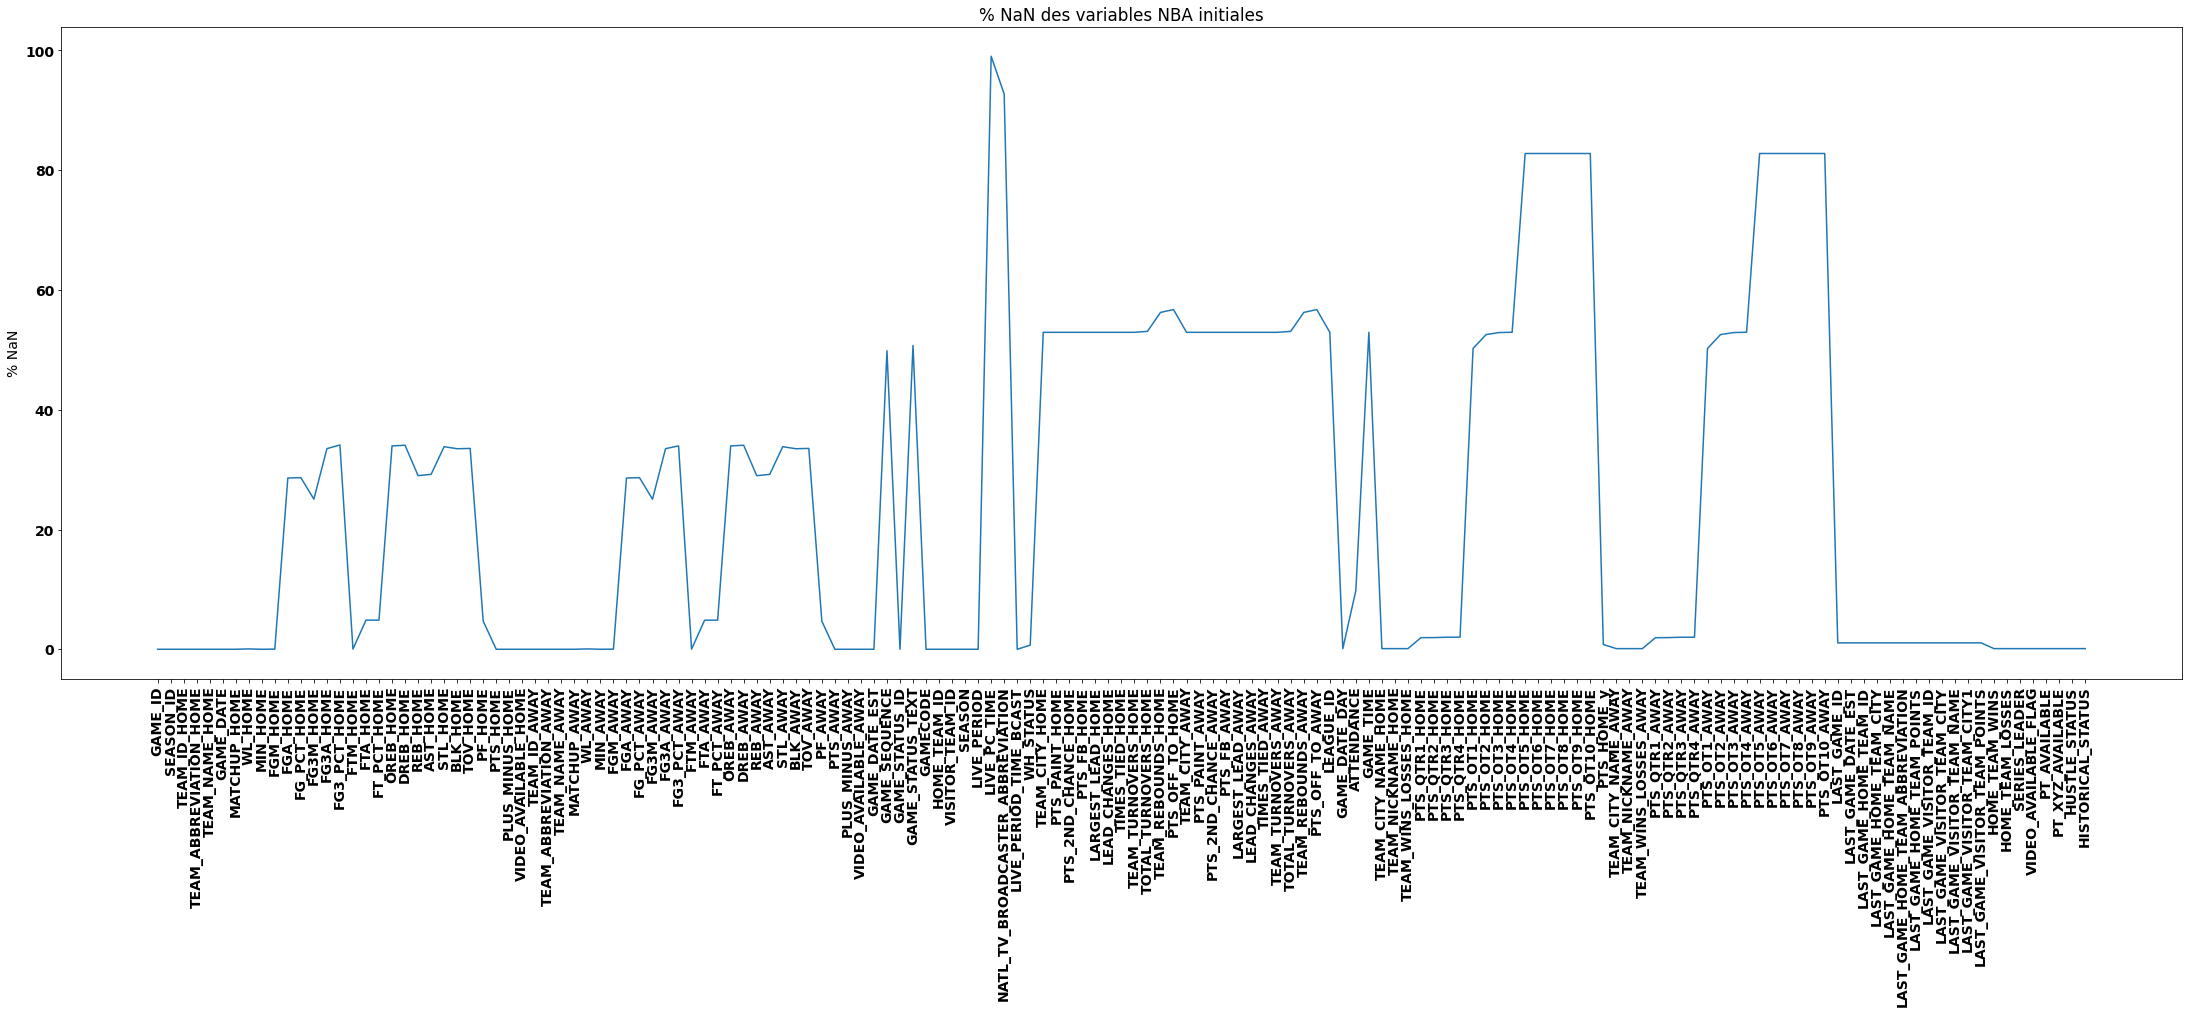

In [ ]:
plt.figure(figsize=(38,12))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)
plt.title ('% NaN des variables NBA initiales')
plt.ylabel('% NaN')
plt.xticks(rotation=90)
plt.plot(df2);

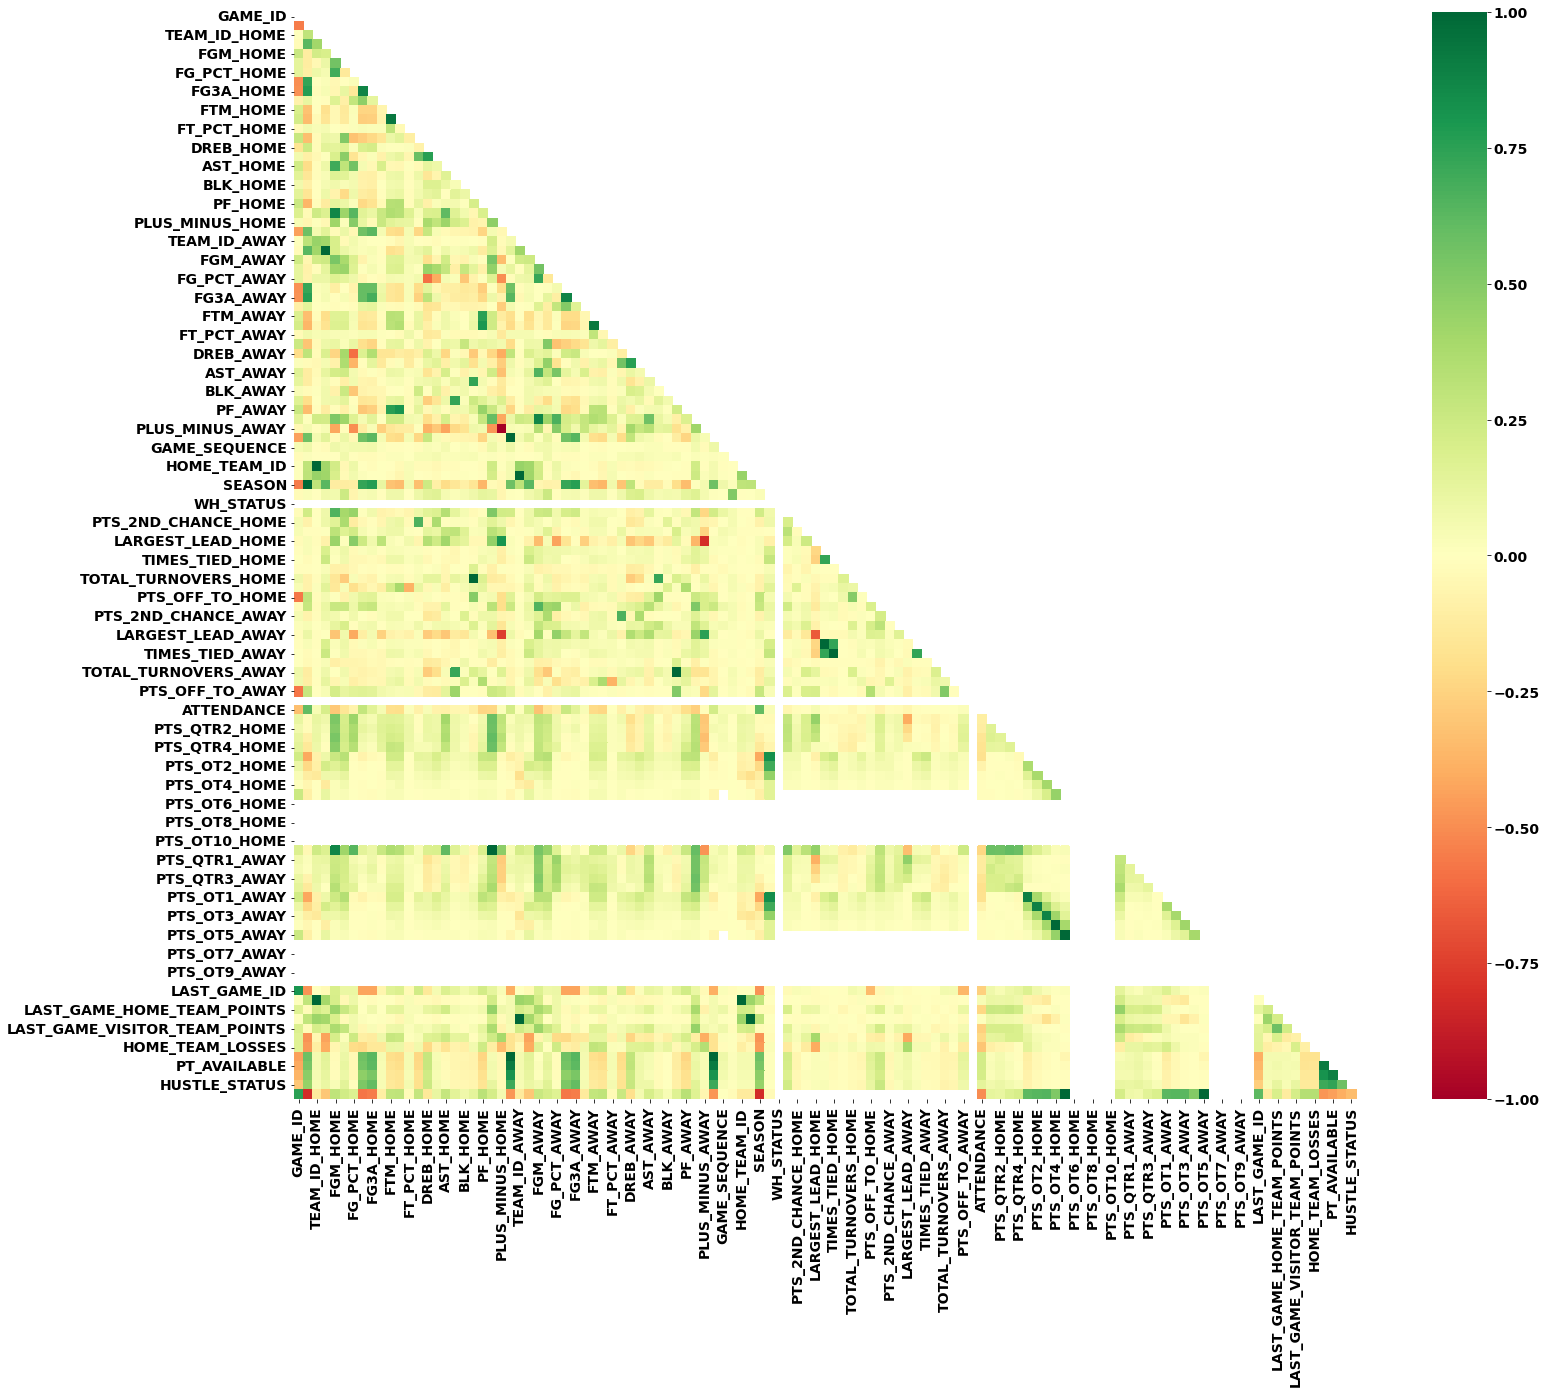

In [ ]:
# pre analyses variables
plt.figure(figsize=(24,20))
matrice  =  np . triu ( df. corr ())
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=False, mask=matrix, cmap="RdYlGn")
plt.show();

In [ ]:
# columns to drop 
df = df.drop(['GAME_ID','TEAM_NAME_HOME','MATCHUP_HOME','FGM_HOME','FGA_HOME','FG3M_HOME','FG3A_HOME','FTM_HOME','FTA_HOME','PLUS_MINUS_HOME','VIDEO_AVAILABLE_HOME','TEAM_NAME_AWAY',
'MATCHUP_AWAY','MIN_AWAY','FGM_AWAY','FGA_AWAY','FG3M_AWAY','FG3A_AWAY','FTM_AWAY','FTA_AWAY','VIDEO_AVAILABLE_AWAY','GAME_STATUS_ID','GAMECODE','LIVE_PERIOD','LIVE_PC_TIME','NATL_TV_BROADCASTER_ABBREVIATION',
'LIVE_PERIOD_TIME_BCAST','WH_STATUS','TEAM_CITY_HOME','LEAD_CHANGES_HOME','TIMES_TIED_HOME','TEAM_TURNOVERS_HOME','TOTAL_TURNOVERS_HOME','TEAM_REBOUNDS_HOME','TEAM_CITY_AWAY','PTS_FB_AWAY','LEAD_CHANGES_AWAY',
'TEAM_TURNOVERS_AWAY','TOTAL_TURNOVERS_AWAY','TEAM_REBOUNDS_AWAY','LEAGUE_ID','GAME_DATE_DAY','TEAM_CITY_NAME_HOME','TEAM_NICKNAME_HOME','PTS_OT2_HOME','PTS_OT3_HOME','PTS_OT5_HOME','PTS_OT6_HOME','PTS_OT7_HOME',
'PTS_OT8_HOME','PTS_OT9_HOME','PTS_OT10_HOME','PTS_HOME_y', 'TEAM_CITY_NAME_AWAY','TEAM_NICKNAME_AWAY','PTS_OT2_AWAY','PTS_OT3_AWAY','PTS_OT5_AWAY','PTS_OT6_AWAY','PTS_OT7_AWAY','PTS_OT8_AWAY','PTS_OT9_AWAY',
'PTS_OT10_AWAY','LAST_GAME_ID','LAST_GAME_HOME_TEAM_ID','LAST_GAME_HOME_TEAM_CITY','LAST_GAME_HOME_TEAM_ABBREVIATION','LAST_GAME_VISITOR_TEAM_ID','LAST_GAME_VISITOR_TEAM_CITY','LAST_GAME_VISITOR_TEAM_CITY1','SERIES_LEADER',
'VIDEO_AVAILABLE_FLAG','PT_AVAILABLE','HUSTLE_STATUS','HISTORICAL_STATUS','GAME_DATE_EST'],axis=1)

In [ ]:
df.info() # nouveau df de départ après supression des colonnes <-> PREMIERE BOUCLE ANALYSE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62448 entries, 0 to 62447
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SEASON_ID                      62448 non-null  int64  
 1   TEAM_ID_HOME                   62448 non-null  int64  
 2   TEAM_ABBREVIATION_HOME         62448 non-null  object 
 3   GAME_DATE                      62448 non-null  object 
 4   WL_HOME                        62408 non-null  object 
 5   MIN_HOME                       62448 non-null  int64  
 6   FG_PCT_HOME                    44548 non-null  float64
 7   FG3_PCT_HOME                   41142 non-null  float64
 8   FT_PCT_HOME                    59409 non-null  float64
 9   OREB_HOME                      41240 non-null  float64
 10  DREB_HOME                      41171 non-null  float64
 11  REB_HOME                       44340 non-null  float64
 12  AST_HOME                       44204 non-null 

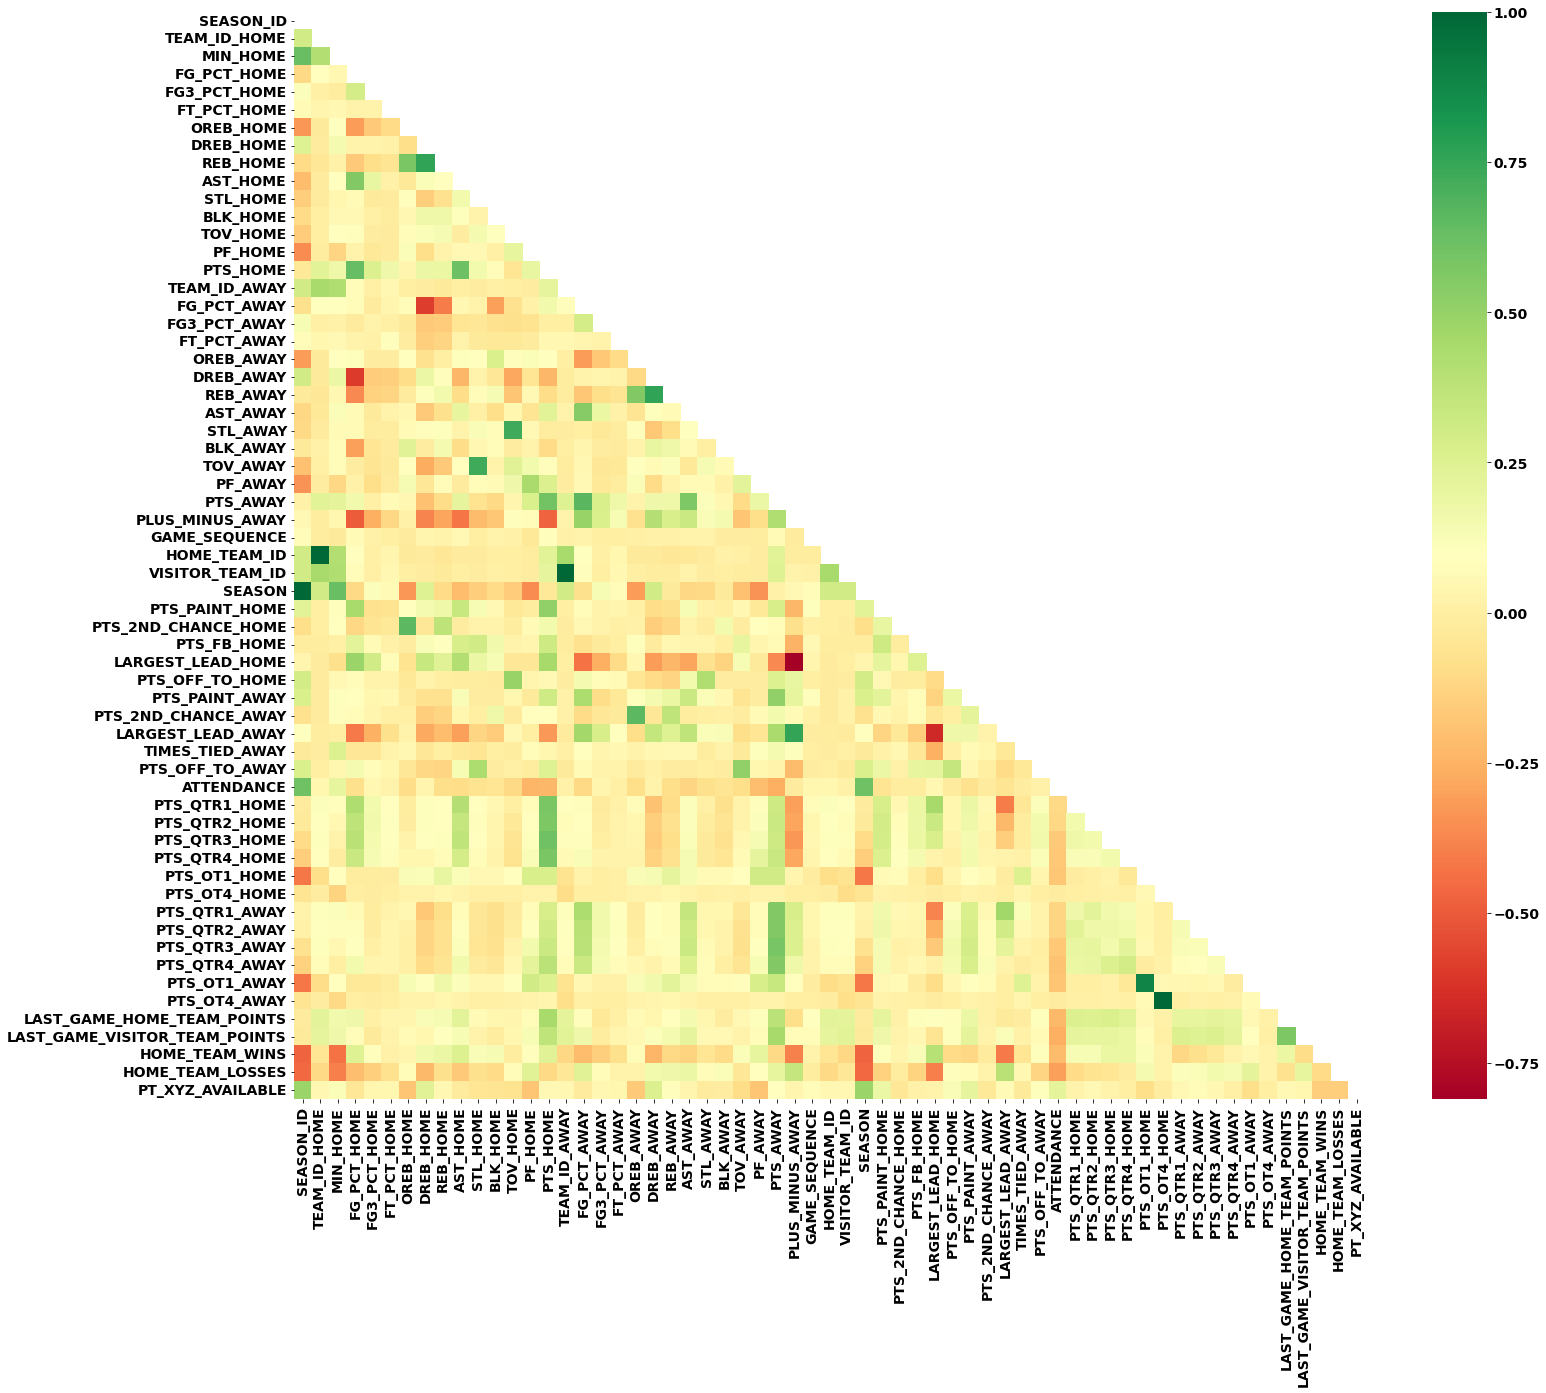

In [ ]:
# Nouvelle observation des corrélations après nettoyage 1
# pre analyses variables
plt.figure(figsize=(24,20))
matrice  =  np . triu ( df. corr ())
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=False, mask=matrix, cmap="RdYlGn")
plt.show();

In [ ]:
# copie du df avant tests de festure engineering
df_bis=df.copy()

In [ ]:
df_bis.head()

SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME   GAME_DATE WL_HOME  \
0      21946    1610610035                    HUS  1946-11-01       L   
1      21946    1610610034                    BOM  1946-11-02       W   
2      21946    1610610025                    CHS  1946-11-02       W   
3      21946    1610610032                    PRO  1946-11-02       W   
4      21946    1610610028                    DEF  1946-11-02       L   

   MIN_HOME  FG_PCT_HOME  FG3_PCT_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  \
0         0          NaN           NaN        0.552        NaN        NaN   
1         0        0.339           NaN          NaN        NaN        NaN   
2         0          NaN           NaN          NaN        NaN        NaN   
3         0          NaN           NaN          NaN        NaN        NaN   
4         0          NaN           NaN          NaN        NaN        NaN   

   REB_HOME  AST_HOME  STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  \
0       NaN       NaN       NaN       NaN       NaN      NaN        66   
1       NaN       NaN       NaN       NaN       NaN     21.0        56   
2       NaN       NaN       NaN       NaN       NaN     20.0        63   
3       NaN       NaN       NaN       NaN       NaN      NaN        59   
4       NaN       NaN       NaN       NaN       NaN      NaN        33   

   TEAM_ID_AWAY TEAM_ABBREVIATION_AWAY WL_AWAY  FG_PCT_AWAY  FG3_PCT_AWAY  \
0    1610612752                    NYK       W          NaN           NaN   
1    1610610031                    PIT       L        0.222           NaN   
2    1610612752                    NYK       L          NaN           NaN   
3    1610612738                    BOS       L          NaN           NaN   
4    1610610036                    WAS       W          NaN           NaN   

   FT_PCT_AWAY  OREB_AWAY  DREB_AWAY  REB_AWAY  AST_AWAY  STL_AWAY  BLK_AWAY  \
0        0.769        NaN        NaN       NaN       NaN       NaN       NaN   
1          NaN        NaN        NaN       NaN       NaN       NaN       NaN   
2          NaN        NaN        NaN       NaN       NaN       NaN       NaN   
3          NaN        NaN        NaN       NaN       NaN       NaN       NaN   
4          NaN        NaN        NaN       NaN       NaN       NaN       NaN   

   TOV_AWAY  PF_AWAY  PTS_AWAY  PLUS_MINUS_AWAY  GAME_SEQUENCE  \
0       NaN      NaN        68                2            NaN   
1       NaN     25.0        51               -5            NaN   
2       NaN     22.0        47              -16            NaN   
3       NaN      NaN        53               -6            NaN   
4       NaN      NaN        50               17            NaN   

  GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  PTS_PAINT_HOME  \
0              NaN    1610610035       1610612752    1946             NaN   
1              NaN    1610610034       1610610031    1946             NaN   
2              NaN    1610610025       1610612752    1946             NaN   
3              NaN    1610610032       1610612738    1946             NaN   
4              NaN    1610610028       1610610036    1946             NaN   

   PTS_2ND_CHANCE_HOME  PTS_FB_HOME  LARGEST_LEAD_HOME  PTS_OFF_TO_HOME  \
0                  NaN          NaN                NaN              NaN   
1                  NaN          NaN                NaN              NaN   
2                  NaN          NaN                NaN              NaN   
3                  NaN          NaN                NaN              NaN   
4                  NaN          NaN                NaN              NaN   

   PTS_PAINT_AWAY  PTS_2ND_CHANCE_AWAY  LARGEST_LEAD_AWAY  TIMES_TIED_AWAY  \
0             NaN                  NaN                NaN              NaN   
1             NaN                  NaN                NaN              NaN   
2             NaN                  NaN                NaN              NaN   
3             NaN                  NaN                NaN              NaN   
4          

In [ ]:
#import datetime

In [ ]:
#df_bis['GAME_DATE'] = pd.to_datetime(df_bis.GAME_DATE)

In [ ]:
#df_bis['LAST_GAME_DATE_EST'] = pd.to_datetime(df_bis.LAST_GAME_DATE_EST)

In [ ]:
#df_bis['TimeBtw2Games'] = df_bis['GAME_DATE'] - df_bis['LAST_GAME_DATE_EST']

In [ ]:
#df_bis['TimeBtw2Games']

In [ ]:
#plt.figure(figsize=(28,12))
#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 4}

#plt.rc('font', **font)
#df_bis['TimeBtw2Games'].value_counts().plot(kind='bar');

In [ ]:
df_bis.sample(10)

SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME   GAME_DATE WL_HOME  \
25328      21989    1610612742                    DAL  1989-11-29       W   
2921       21954    1610612747                    MNL  1955-01-03       W   
12880      21975    1610612746                    BUF  1976-03-23       W   
51253      22011    1610612761                    TOR  2012-03-11       L   
40448      22002    1610612762                    UTA  2003-02-22       W   
36977      21999    1610612753                    ORL  2000-03-11       W   
489        21947    1610610025                    CHS  1948-02-27       L   
54798      22014    1610612743                    DEN  2015-01-23       L   
23721      21987    1610612764                    WAS  1988-02-15       L   
47978      22008    1610612751                    NJN  2009-03-20       W   

       MIN_HOME  FG_PCT_HOME  FG3_PCT_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  \
25328       240        0.439         0.143        0.853       11.0       42.0   
2921          0          NaN           NaN          NaN        NaN        NaN   
12880       240          NaN           NaN        0.824        NaN        NaN   
51253       240        0.465         0.308        0.789       13.0       30.0   
40448       240        0.492         0.500        0.667       12.0       33.0   
36977       240        0.451         0.143        0.723       16.0       24.0   
489           0          NaN           NaN        0.600        NaN        NaN   
54798       240        0.416         0.286        0.731       17.0       31.0   
23721       240        0.386         0.167        0.705       24.0       18.0   
47978       240        0.446         0.563        0.778       11.0       34.0   

       REB_HOME  AST_HOME  STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  \
25328      53.0      20.0       7.0      10.0      10.0     25.0       102   
2921        NaN       NaN       NaN       NaN       NaN     17.0        76   
12880       NaN       NaN       NaN       NaN       NaN     24.0       122   
51253      43.0      23.0       7.0       1.0      13.0     30.0        99   
40448      45.0      26.0       9.0       6.0      21.0     26.0        99   
36977      40.0      18.0      13.0       2.0      14.0     33.0       110   
489         NaN       NaN       NaN       NaN       NaN      NaN        69   
54798      48.0      20.0       8.0       2.0      13.0     19.0        99   
23721      42.0      15.0      14.0       8.0      16.0     33.0       110   
47978      45.0      23.0       7.0       8.0      10.0     19.0        96   

       TEAM_ID_AWAY TEAM_ABBREVIATION_AWAY WL_AWAY  FG_PCT_AWAY  FG3_PCT_AWAY  \
25328    1610612766                    CHH       L        0.317         0.000   
2921     1610612744                    PHW       L          NaN           NaN   
12880    1610612741                    CHI       L          NaN           NaN   
51253    1610612749                    MIL       W        0.479         0.333   
40448    1610612743                    DEN       L        0.352         0.250   
36977    1610612743                    DEN       L        0.507         0.267   
489      1610612738                    BOS       W          NaN           NaN   
54798    1610612738                    BOS       W        0.493         0.429   
23721    1610612749                    MIL       W        0.600         0.000   
47978    1610612748                    MIA       L        0.410         0.190   

       FT_PCT_AWAY  OREB_AWAY  DREB_AWAY  REB_AWAY  AST_AWAY  STL_AWAY  \
25328        0.826       17.0       35.0      52.0      24.0       4.0   
2921           NaN        NaN        NaN       NaN       NaN       NaN   
12880        0.700        NaN        NaN       NaN       NaN       NaN   
51253        0.829        8.0       28.0      36.0      26.0       6.0   
40448        0.758       17.0       26.0      43.0      20.0      12.0   
36977        0.875        7.0       29.0      36.0      24.0       4.0  

In [ ]:
df_bis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62448 entries, 0 to 62447
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SEASON_ID                      62448 non-null  int64  
 1   TEAM_ID_HOME                   62448 non-null  int64  
 2   TEAM_ABBREVIATION_HOME         62448 non-null  object 
 3   GAME_DATE                      62448 non-null  object 
 4   WL_HOME                        62408 non-null  object 
 5   MIN_HOME                       62448 non-null  int64  
 6   FG_PCT_HOME                    44548 non-null  float64
 7   FG3_PCT_HOME                   41142 non-null  float64
 8   FT_PCT_HOME                    59409 non-null  float64
 9   OREB_HOME                      41240 non-null  float64
 10  DREB_HOME                      41171 non-null  float64
 11  REB_HOME                       44340 non-null  float64
 12  AST_HOME                       44204 non-null 

In [ ]:
x=df_bis['GAME_DATE']
y=df_bis['FG_PCT_AWAY']
y2=df_bis['FG_PCT_HOME']

# RESTRICTION ARBITRAIRE HISTORIQUE DATAFRAME -> +/- 20 DERNIERES ANNEES

In [ ]:
df_ter = df_bis.iloc[38500:,:] # choix arbitraire de selection des 20 dernières années

In [ ]:
df_ter.head()

SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME   GAME_DATE WL_HOME  \
38500      22001    1610612741                    CHI  2001-11-03       W   
38501      22001    1610612757                    POR  2001-11-03       L   
38502      22001    1610612760                    SEA  2001-11-03       L   
38503      22001    1610612749                    MIL  2001-11-03       W   
38504      22001    1610612739                    CLE  2001-11-03       L   

       MIN_HOME  FG_PCT_HOME  FG3_PCT_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  \
38500       240        0.413         0.308        0.750        4.0       37.0   
38501       240        0.402         0.300        0.783        7.0       30.0   
38502       240        0.389         0.286        0.737       10.0       19.0   
38503       240        0.453         0.353        0.912        9.0       37.0   
38504       240        0.253         0.273        0.788       15.0       35.0   

       REB_HOME  AST_HOME  STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  \
38500      41.0      25.0      14.0       5.0      13.0     27.0        84   
38501      37.0      16.0       1.0       3.0      10.0     23.0        90   
38502      29.0      21.0      11.0       5.0      20.0     30.0        74   
38503      46.0      24.0       7.0       5.0      12.0     19.0       105   
38504      50.0      14.0       3.0       5.0      17.0     22.0        69   

       TEAM_ID_AWAY TEAM_ABBREVIATION_AWAY WL_AWAY  FG_PCT_AWAY  FG3_PCT_AWAY  \
38500    1610612752                    NYK       L        0.347         0.167   
38501    1610612759                    SAS       W        0.456         0.560   
38502    1610612762                    UTA       W        0.459         0.429   
38503    1610612738                    BOS       L        0.382         0.429   
38504    1610612753                    ORL       W        0.424         0.267   

       FT_PCT_AWAY  OREB_AWAY  DREB_AWAY  REB_AWAY  AST_AWAY  STL_AWAY  \
38500        0.774       10.0       34.0      44.0      18.0       5.0   
38501        0.741       11.0       36.0      47.0      22.0       4.0   
38502        0.625       16.0       29.0      45.0      25.0      12.0   
38503        0.792       16.0       25.0      41.0      24.0       5.0   
38504        0.708       16.0       43.0      59.0      24.0       7.0   

       BLK_AWAY  TOV_AWAY  PF_AWAY  PTS_AWAY  PLUS_MINUS_AWAY  GAME_SEQUENCE  \
38500       4.0      18.0     21.0        79               -5            6.0   
38501      10.0      10.0     18.0       106               16           10.0   
38502       4.0      20.0     19.0        91               17            5.0   
38503       4.0       8.0     24.0        99               -6            7.0   
38504      12.0      10.0     26.0        99               30            3.0   

      GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  PTS_PAINT_HOME  \
38500            Final    1610612741       1610612752    2001            32.0   
38501            Final    1610612757       1610612759    2001            24.0   
38502            Final    1610612760       1610612762    2001            30.0   
38503            Final    1610612749       1610612738    2001            26.0   
38504            Final    1610612739       1610612753    2001            12.0   

       PTS_2ND_CHANCE_HOME  PTS_FB_HOME  LARGEST_LEAD_HOME  PTS_OFF_TO_HOME  \
38500                 11.0         10.0                5.0              7.0   
38501                  7.0          7.0                0.0             14.0   
38502                 10.0          3.0                4.0             26.0   
38503                 14.0          4.0               16.0             14.0   
38504                  7.0          6.0                1.0             13.0   

       PTS_PAINT_AWAY  PTS_2ND_CHANCE_AWAY  LARGEST_LEAD_AWAY  \
38500            32.0                 10.0                9.0   
38501            26.0                 13.0               23.0   
38502            5

In [ ]:
#plt.figure( figsize= (15, 15) )
#plt.subplot(121)
#plt.bar(df_ter['GAME_DATE'],df_ter['FG_PCT_AWAY'], label = "FG_PCT_AWAY")
#plt.yticks(range(0,2))
#plt.legend()
#plt.subplot(122)
#plt.bar(df_ter['GAME_DATE'],df_ter['FG_PCT_HOME'], color = ['#f7bf59'], label = "FG_PCT_HOME")
#plt.yticks(range(0,2))
#plt.legend()


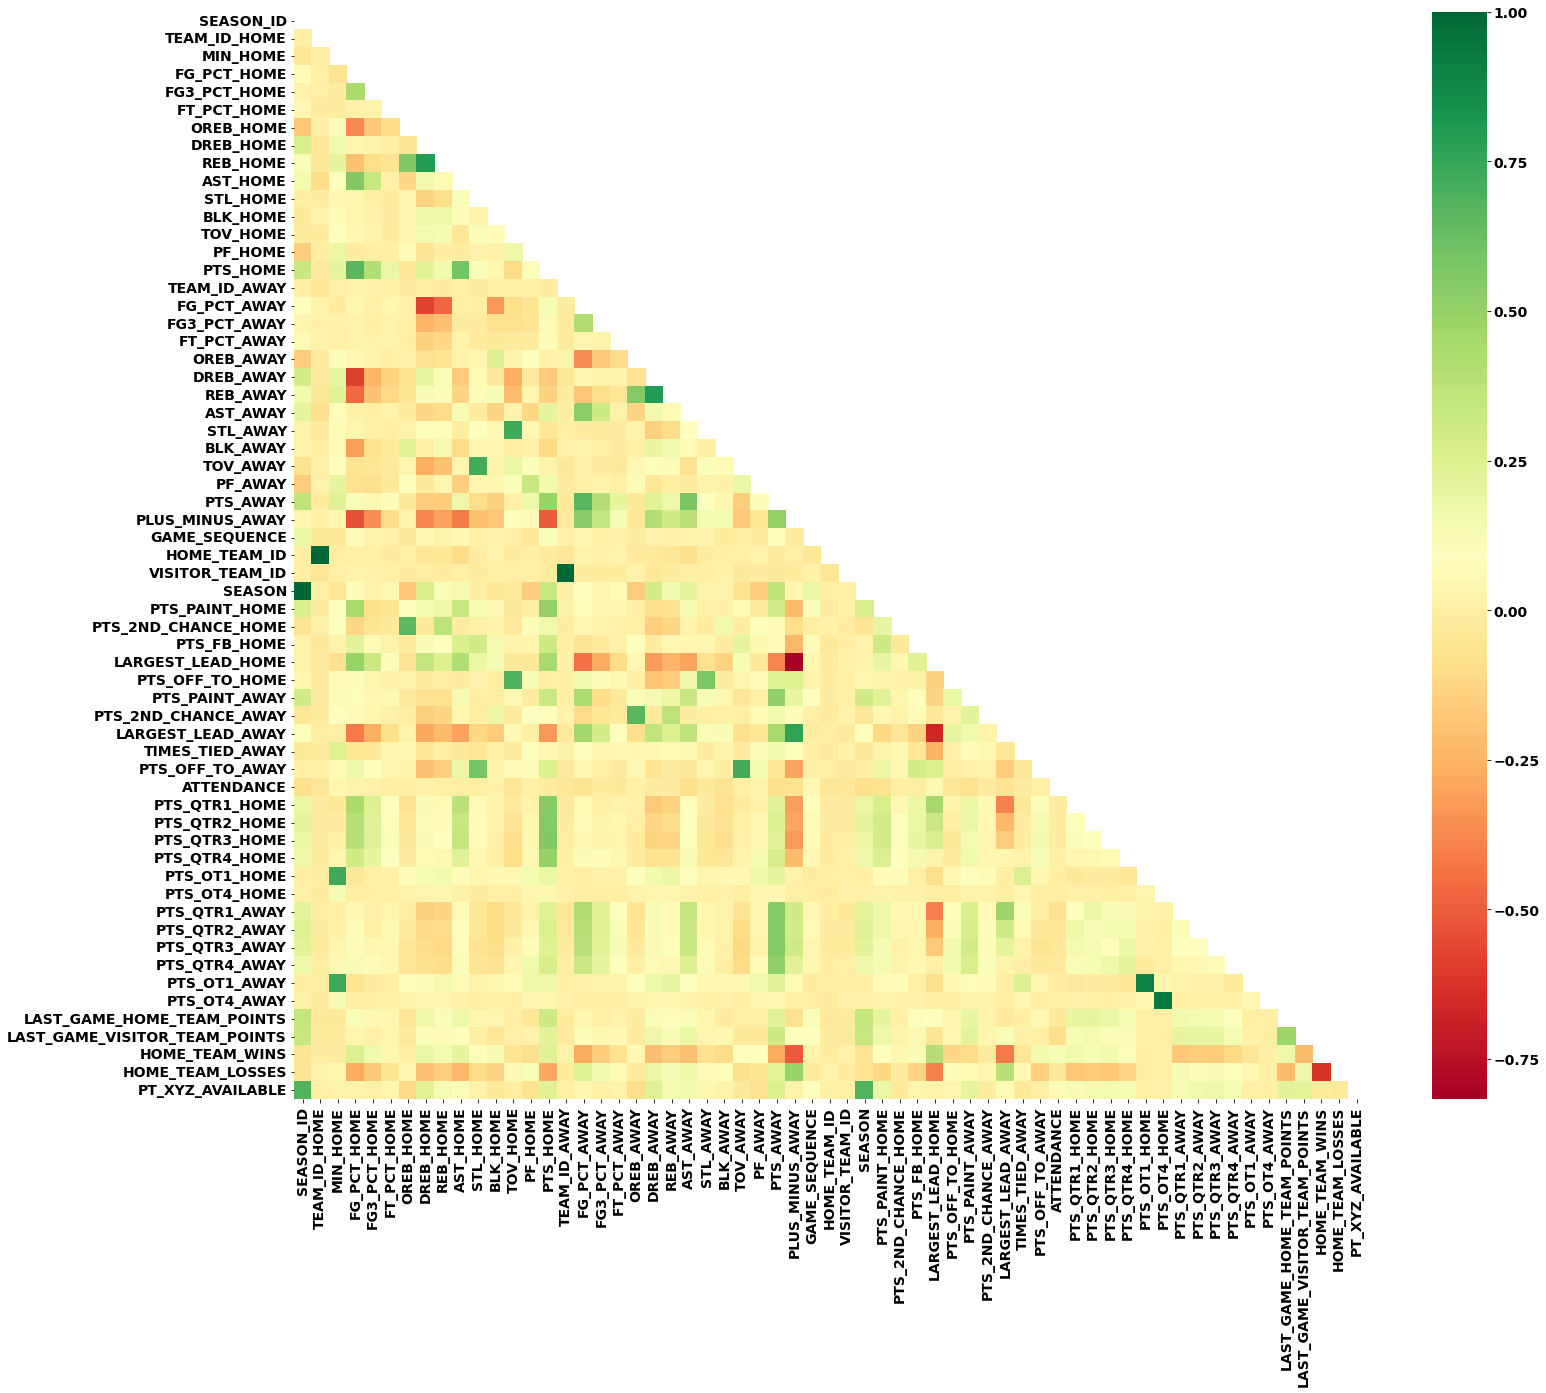

In [ ]:
# Nouvelle observation des corrélations après nettoyage 1 + RESTRICTION DATASET AUX 20 DERNIERES ANNEES
# pre analyses variables
plt.figure(figsize=(24,20))
matrice  =  np . triu ( df_ter. corr ())
matrix = np.triu(df_ter.corr())
sns.heatmap(df_ter.corr(), annot=False, mask=matrix, cmap="RdYlGn")
plt.show();

In [ ]:
# ANALYSE COMPLEMENTAIRE EN VUE DU PRROCHAIN NETTOYAGE
# Analyse croisée complémentaire des zones à correlations significatives (>0.5), montrant les mêmes tendances que les graphiques ci avant
# corr matrix pour la famille des données d'emprunts (trèes fortes corrélations)
cor = df_ter.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor_stack = cor.stack()
print("Columns with corr. greater than 0.5 ")
print(cor_stack[(cor_stack > 0.50) ])

In [ ]:
# recherche des NaN sur df_ter
df_ter.isna().sum()

In [ ]:
cols_with_missing = [col for col in df_ter.columns if df_ter[col].isna().any()]
len(cols_with_missing)

36

In [ ]:
# SUPPRESSION DES VALEURS MANQUANTES NAN DE TYPE OBJECT PAR LEUR MODE
# [col for col in df_ter.columns if df_ter[col].dtype=='object']
# df_ter_obj = df_ter[object_column2]
# column_mode = df_ter_obj.mode()   # ABANDON PISTE MODE
# for col in df_ter_obj:
  #df_ter_obj = df_ter_obj.dropna(object_column2)

In [ ]:
# REMPLACEMENT DES VALEURS MANQUANTES NAN DE TYPE NUMERIC PAR LEUR MOYENNE
num_column2=[col for col in df_ter.columns if df_ter[col].dtype in ['int64','float64']]

In [ ]:
df_ter_num = df_ter[num_column2]

In [ ]:
column_means = df_ter_num. mean()
column_means

In [ ]:
for col in df_ter:
  df_ter_num = df_ter. fillna(column_means)

In [ ]:
df_ter_num.isna().sum()

In [ ]:
df_ter_num.info()

In [ ]:
# Nettoyage des lignes manquantes (données manquantes object)
df_ter_num = df_ter_num.dropna(axis=0)

In [ ]:
df_ter_num.info()

In [ ]:
df_ter_num.isna().sum()

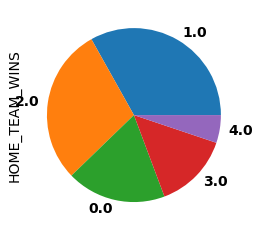

In [ ]:
# observation de la variable HOME TEAM WINS -> ATTENTION CE N'EST PAS LA VARIABLE TARGET
df_ter_num['HOME_TEAM_WINS'].value_counts().plot.pie();

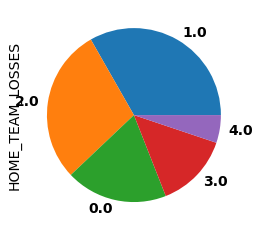

In [ ]:
# observation de la variable HOME TEAM WINS -> ATTENTION CE N'EST PAS LA VARIABLE TARGET
df_ter_num['HOME_TEAM_LOSSES'].value_counts().plot.pie();

# observation des variables TARGET

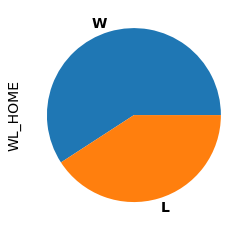

In [ ]:
df_ter_num['WL_HOME'].value_counts().plot.pie();

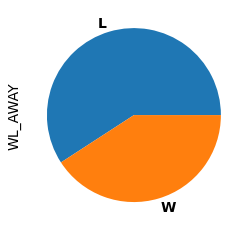

In [ ]:
df_ter_num['WL_AWAY'].value_counts().plot.pie();

# Séparations en dataset tests et entrainement

In [ ]:
df_ter_num['WL_HOME'] = df_ter_num['WL_HOME'].replace(['W','L'],[1,0]) # ou df[].map

In [ ]:
df_ter_num['WL_AWAY']=df_ter_num['WL_AWAY'].replace(['W','L'],[1,0])

In [ ]:
df_ter_num.head()

SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME   GAME_DATE  WL_HOME  \
38500      22001    1610612741                    CHI  2001-11-03        1   
38501      22001    1610612757                    POR  2001-11-03        0   
38502      22001    1610612760                    SEA  2001-11-03        0   
38503      22001    1610612749                    MIL  2001-11-03        1   
38504      22001    1610612739                    CLE  2001-11-03        0   

       MIN_HOME  FG_PCT_HOME  FG3_PCT_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  \
38500       240        0.413         0.308        0.750        4.0       37.0   
38501       240        0.402         0.300        0.783        7.0       30.0   
38502       240        0.389         0.286        0.737       10.0       19.0   
38503       240        0.453         0.353        0.912        9.0       37.0   
38504       240        0.253         0.273        0.788       15.0       35.0   

       REB_HOME  AST_HOME  STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  \
38500      41.0      25.0      14.0       5.0      13.0     27.0        84   
38501      37.0      16.0       1.0       3.0      10.0     23.0        90   
38502      29.0      21.0      11.0       5.0      20.0     30.0        74   
38503      46.0      24.0       7.0       5.0      12.0     19.0       105   
38504      50.0      14.0       3.0       5.0      17.0     22.0        69   

       TEAM_ID_AWAY TEAM_ABBREVIATION_AWAY  WL_AWAY  FG_PCT_AWAY  \
38500    1610612752                    NYK        0        0.347   
38501    1610612759                    SAS        1        0.456   
38502    1610612762                    UTA        1        0.459   
38503    1610612738                    BOS        0        0.382   
38504    1610612753                    ORL        1        0.424   

       FG3_PCT_AWAY  FT_PCT_AWAY  OREB_AWAY  DREB_AWAY  REB_AWAY  AST_AWAY  \
38500         0.167        0.774       10.0       34.0      44.0      18.0   
38501         0.560        0.741       11.0       36.0      47.0      22.0   
38502         0.429        0.625       16.0       29.0      45.0      25.0   
38503         0.429        0.792       16.0       25.0      41.0      24.0   
38504         0.267        0.708       16.0       43.0      59.0      24.0   

       STL_AWAY  BLK_AWAY  TOV_AWAY  PF_AWAY  PTS_AWAY  PLUS_MINUS_AWAY  \
38500       5.0       4.0      18.0     21.0        79               -5   
38501       4.0      10.0      10.0     18.0       106               16   
38502      12.0       4.0      20.0     19.0        91               17   
38503       5.0       4.0       8.0     24.0        99               -6   
38504       7.0      12.0      10.0     26.0        99               30   

       GAME_SEQUENCE GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
38500            6.0            Final    1610612741       1610612752    2001   
38501           10.0            Final    1610612757       1610612759    2001   
38502            5.0            Final    1610612760       1610612762    2001   
38503            7.0            Final    1610612749       1610612738    2001   
38504            3.0            Final    1610612739       1610612753    2001   

       PTS_PAINT_HOME  PTS_2ND_CHANCE_HOME  PTS_FB_HOME  LARGEST_LEAD_HOME  \
38500            32.0                 11.0         10.0                5.0   
38501            24.0                  7.0          7.0                0.0   
38502            30.0                 10.0          3.0                4.0   
38503            26.0                 14.0          4.0               16.0   
38504            12.0                  7.0          6.0                1.0   

       PTS_OFF_TO_HOME  PTS_PAINT_AWAY  PTS_2ND_CHANCE_AWAY  \
38500              7.0            32.0                 10.0   
38501             14.0            26.0                 13.0   
38502             26.0            54.0                 19.0   
38503             14.0            28.0             

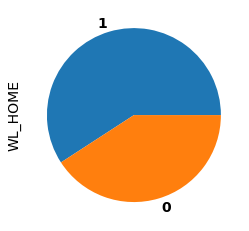

In [ ]:
df_ter_num['WL_HOME'].value_counts().plot.pie();

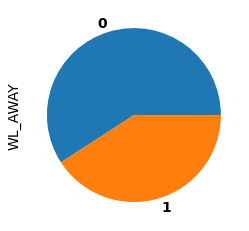

In [ ]:
df_ter_num['WL_AWAY'].value_counts().plot.pie();

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve

In [ ]:
X=df_ter_num.drop(['WL_HOME','WL_AWAY',"LAST_GAME_HOME_TEAM_NAME","LAST_GAME_VISITOR_TEAM_NAME",'GAME_TIME','GAME_DATE','LAST_GAME_DATE_EST'],axis=1) #"TimeBtw2Games"

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23810 entries, 38500 to 62447
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SEASON_ID                      23810 non-null  int64  
 1   TEAM_ID_HOME                   23810 non-null  int64  
 2   TEAM_ABBREVIATION_HOME         23810 non-null  object 
 3   MIN_HOME                       23810 non-null  int64  
 4   FG_PCT_HOME                    23810 non-null  float64
 5   FG3_PCT_HOME                   23810 non-null  float64
 6   FT_PCT_HOME                    23810 non-null  float64
 7   OREB_HOME                      23810 non-null  float64
 8   DREB_HOME                      23810 non-null  float64
 9   REB_HOME                       23810 non-null  float64
 10  AST_HOME                       23810 non-null  float64
 11  STL_HOME                       23810 non-null  float64
 12  BLK_HOME                       23810 non-n

In [ ]:
y=df_ter_num['WL_HOME']
y.head()

38500    1
38501    0
38502    0
38503    1
38504    0
Name: WL_HOME, dtype: int64

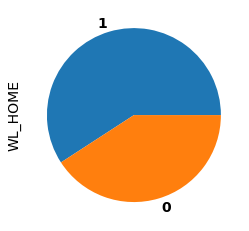

In [ ]:
y.value_counts().plot.pie();

In [ ]:
print('X_shape:',X.shape,'\n \n','y_shape:',y.shape)

X_shape: (23810, 66) 
 
 y_shape: (23810,)


In [ ]:
#xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=1/3, random_state=111, stratify = y)

In [ ]:
numeric_features = [col for col in X.columns if X[col].dtype in ['int64','float64']]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [col for col in X.columns if X[col].dtype =='object']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
print(numeric_features)

['SEASON_ID', 'TEAM_ID_HOME', 'MIN_HOME', 'FG_PCT_HOME', 'FG3_PCT_HOME', 'FT_PCT_HOME', 'OREB_HOME', 'DREB_HOME', 'REB_HOME', 'AST_HOME', 'STL_HOME', 'BLK_HOME', 'TOV_HOME', 'PF_HOME', 'PTS_HOME', 'TEAM_ID_AWAY', 'FG_PCT_AWAY', 'FG3_PCT_AWAY', 'FT_PCT_AWAY', 'OREB_AWAY', 'DREB_AWAY', 'REB_AWAY', 'AST_AWAY', 'STL_AWAY', 'BLK_AWAY', 'TOV_AWAY', 'PF_AWAY', 'PTS_AWAY', 'PLUS_MINUS_AWAY', 'GAME_SEQUENCE', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'PTS_PAINT_HOME', 'PTS_2ND_CHANCE_HOME', 'PTS_FB_HOME', 'LARGEST_LEAD_HOME', 'PTS_OFF_TO_HOME', 'PTS_PAINT_AWAY', 'PTS_2ND_CHANCE_AWAY', 'LARGEST_LEAD_AWAY', 'TIMES_TIED_AWAY', 'PTS_OFF_TO_AWAY', 'ATTENDANCE', 'PTS_QTR1_HOME', 'PTS_QTR2_HOME', 'PTS_QTR3_HOME', 'PTS_QTR4_HOME', 'PTS_OT1_HOME', 'PTS_OT4_HOME', 'PTS_QTR1_AWAY', 'PTS_QTR2_AWAY', 'PTS_QTR3_AWAY', 'PTS_QTR4_AWAY', 'PTS_OT1_AWAY', 'PTS_OT4_AWAY', 'LAST_GAME_HOME_TEAM_POINTS', 'LAST_GAME_VISITOR_TEAM_POINTS', 'HOME_TEAM_WINS', 'HOME_TEAM_LOSSES', 'PT_XYZ_AVAILABLE']


In [ ]:
numeric_transformer

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [ ]:
print(categorical_features)

['TEAM_ABBREVIATION_HOME', 'TEAM_ABBREVIATION_AWAY', 'GAME_STATUS_TEXT', 'TEAM_WINS_LOSSES_HOME', 'TEAM_WINS_LOSSES_AWAY']


In [ ]:
print(len(numeric_features))

61


In [ ]:
print(len(categorical_features))

5


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
clf1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify = y)

clf1.fit(X_train, y_train)
print("model score: %.3f" % clf1.score(X_test, y_test))

model score: 0.998


In [ ]:
X_train.head()

SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME  MIN_HOME  FG_PCT_HOME  \
52772      22012    1610612751                    BKN       240        0.488   
43426      22005    1610612744                    GSW       240        0.377   
49401      22009    1610612746                    LAC       240        0.506   
40696      22002    1610612748                    MIA       240        0.622   
56029      22015    1610612745                    HOU       240        0.404   

       FG3_PCT_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  REB_HOME  AST_HOME  \
52772         0.238        0.733       11.0       29.0      40.0      17.0   
43426         0.222        0.935        6.0       21.0      27.0      16.0   
49401         0.391        0.737        9.0       39.0      48.0      31.0   
40696         0.500        0.700        7.0       30.0      37.0      30.0   
56029         0.341        0.688       15.0       27.0      42.0      27.0   

       STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  TEAM_ID_AWAY  \
52772       8.0       7.0       9.0     17.0       105    1610612766   
43426       7.0       1.0      10.0     17.0        89    1610612759   
49401       9.0       7.0      12.0     21.0       107    1610612747   
40696      11.0       9.0      18.0     22.0       111    1610612750   
56029      10.0      10.0      12.0     21.0       102    1610612749   

      TEAM_ABBREVIATION_AWAY  FG_PCT_AWAY  FG3_PCT_AWAY  FT_PCT_AWAY  \
52772                    CHA        0.450         0.333        0.739   
43426                    SAS        0.549         0.462        0.850   
49401                    LAL        0.395         0.364        0.679   
40696                    MIN        0.422         0.143        0.750   
56029                    MIL        0.459         0.214        0.773   

       OREB_AWAY  DREB_AWAY  REB_AWAY  AST_AWAY  STL_AWAY  BLK_AWAY  TOV_AWAY  \
52772       13.0       30.0      43.0      18.0       4.0       6.0      16.0   
43426       13.0       39.0      52.0      31.0       6.0       8.0      14.0   
49401       16.0       33.0      49.0      20.0       3.0       2.0      14.0   
40696       12.0       18.0      30.0      22.0      12.0       6.0      15.0   
56029       14.0       34.0      48.0      30.0       7.0      10.0      15.0   

       PF_AWAY  PTS_AWAY  PLUS_MINUS_AWAY  GAME_SEQUENCE GAME_STATUS_TEXT  \
52772     24.0        96               -9            2.0            Final   
43426     23.0       113               24           11.0            Final   
49401     16.0        91              -16           12.0            Final   
40696     16.0        84              -27            6.0            Final   
56029     17.0        98               -4            6.0            Final   

       HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  PTS_PAINT_HOME  \
52772    1610612751       1610612766    2012            52.0   
43426    1610612744       1610612759    2005            36.0   
49401    1610612746       1610612747    2009            48.0   
40696    1610612748       1610612750    2002            54.0   
56029    1610612745       1610612749    2015            42.0   

       PTS_2ND_CHANCE_HOME  PTS_FB_HOME  LARGEST_LEAD_HOME  PTS_OFF_TO_HOME  \
52772                 14.0          8.0                9.0              8.0   
43426                  7.0         11.0                0.0             10.0   
49401                  7.0         29.0               21.0              8.0   
40696                 19.0         30.0               29.0             13.0   
56029                 20.0         18.0               15.0             20.0   

       PTS_PAINT_AWAY  PTS_2ND_CHANCE_AWAY  LARGEST_LEAD_AWAY  \
52772            32.0                 11.0                4.0   
43426            60.0                 13.0               36.0   
49401            36.0                 17.0                5.0   
40696            36.0                 20.0               18.0   
56029            58.0                 17.0              

In [ ]:
y_pred = clf1.predict(X_test)

In [ ]:
pred = clf1.predict_proba(X_test)[:,1]

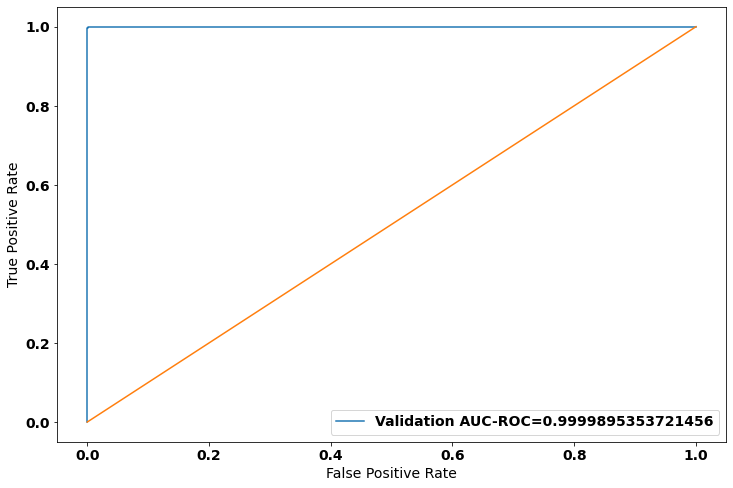

In [ ]:
fpr, tpr, _ = roc_curve(y_test,pred) 
auc = roc_auc_score(y_test, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [ ]:
# Confusion Matrix
pred_val = clf1.predict(X_test)

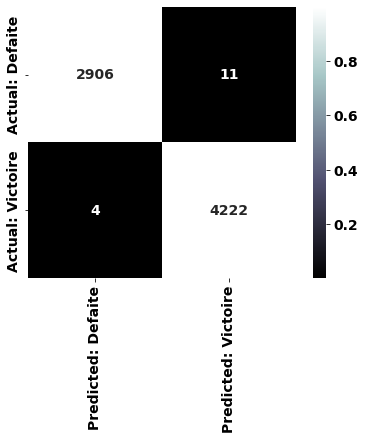

In [ ]:
label_preds = pred_val
cm = confusion_matrix(y_test,label_preds)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[6, 5])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: Defaite','Predicted: Victoire'], yticklabels=['Actual: Defaite','Actual: Victoire'], cmap=cmap)

plot_confusion_matrix(cm, ['Defaite', 'Victoire'])

In [ ]:
# DOUTE SUR CES RESULTATS

In [ ]:
##################################################
# reprise encodage en mode manuel

In [ ]:
y.head()

38500    1
38501    0
38502    0
38503    1
38504    0
Name: WL_HOME, dtype: int64

In [ ]:
X.head(1)

SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME  MIN_HOME  FG_PCT_HOME  \
38500      22001    1610612741                    CHI       240        0.413   

       FG3_PCT_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  REB_HOME  AST_HOME  \
38500         0.308         0.75        4.0       37.0      41.0      25.0   

       STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  TEAM_ID_AWAY  \
38500      14.0       5.0      13.0     27.0        84    1610612752   

      TEAM_ABBREVIATION_AWAY  FG_PCT_AWAY  FG3_PCT_AWAY  FT_PCT_AWAY  \
38500                    NYK        0.347         0.167        0.774   

       OREB_AWAY  DREB_AWAY  REB_AWAY  AST_AWAY  STL_AWAY  BLK_AWAY  TOV_AWAY  \
38500       10.0       34.0      44.0      18.0       5.0       4.0      18.0   

       PF_AWAY  PTS_AWAY  PLUS_MINUS_AWAY  GAME_SEQUENCE GAME_STATUS_TEXT  \
38500     21.0        79               -5            6.0            Final   

       HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  PTS_PAINT_HOME  \
38500    1610612741       1610612752    2001            32.0   

       PTS_2ND_CHANCE_HOME  PTS_FB_HOME  LARGEST_LEAD_HOME  PTS_OFF_TO_HOME  \
38500                 11.0         10.0                5.0              7.0   

       PTS_PAINT_AWAY  PTS_2ND_CHANCE_AWAY  LARGEST_LEAD_AWAY  \
38500            32.0                 10.0                9.0   

       TIMES_TIED_AWAY  PTS_OFF_TO_AWAY  ATTENDANCE TEAM_WINS_LOSSES_HOME  \
38500              4.0             17.0     18064.0                    -0   

       PTS_QTR1_HOME  PTS_QTR2_HOME  PTS_QTR3_HOME  PTS_QTR4_HOME  \
38500           21.0           22.0           16.0           25.0   

       PTS_OT1_HOME  PTS_OT4_HOME TEAM_WINS_LOSSES_AWAY  PTS_QTR1_AWAY  \
38500           0.0           0.0                    -0           25.0   

       PTS_QTR2_AWAY  PTS_QTR3_AWAY  PTS_QTR4_AWAY  PTS_OT1_AWAY  \
38500           20.0           18.0           16.0           0.0   

       PTS_OT4_AWAY  LAST_GAME_HOME_TEAM_POINTS  \
38500           0.0                        80.0   

       LAST_GAME_VISITOR_TEAM_POINTS  HOME_TEAM_WINS  HOME_TEAM_LOSSES  \
38500                          101.0             3.0               1.0   

       PT_XYZ_AVAILABLE  
38500               0.0

In [ ]:
# Encodage One Hot des variables catégorielles du data frame data
categorical_data = X.select_dtypes(exclude=["number"])
categorical_data_enc = pd.get_dummies (categorical_data)
# verification du processus d'encodage one hot des variables catégorielles
categorical_data_enc.head(5)

TEAM_ABBREVIATION_HOME_ATL  TEAM_ABBREVIATION_HOME_BKN  \
38500                           0                           0   
38501                           0                           0   
38502                           0                           0   
38503                           0                           0   
38504                           0                           0   

       TEAM_ABBREVIATION_HOME_BOS  TEAM_ABBREVIATION_HOME_CHA  \
38500                           0                           0   
38501                           0                           0   
38502                           0                           0   
38503                           0                           0   
38504                           0                           0   

       TEAM_ABBREVIATION_HOME_CHH  TEAM_ABBREVIATION_HOME_CHI  \
38500                           0                           1   
38501                           0                           0   
38502                           0                           0   
38503                           0                           0   
38504                           0                           0   

       TEAM_ABBREVIATION_HOME_CLE  TEAM_ABBREVIATION_HOME_DAL  \
38500                           0                           0   
38501                           0                           0   
38502                           0                           0   
38503                           0                           0   
38504                           1                           0   

       TEAM_ABBREVIATION_HOME_DEN  TEAM_ABBREVIATION_HOME_DET  \
38500                           0                           0   
38501                           0                           0   
38502                           0                           0   
38503                           0                           0   
38504                           0                           0   

       TEAM_ABBREVIATION_HOME_GSW  TEAM_ABBREVIATION_HOME_HOU  \
38500                           0                           0   
38501                           0                           0   
38502                           0                           0   
38503                           0                           0   
38504                           0                           0   

       TEAM_ABBREVIATION_HOME_IND  TEAM_ABBREVIATION_HOME_LAC  \
38500                           0                           0   
38501                           0                           0   
38502                           0                           0   
38503                           0                           0   
38504                           0                           0   

       TEAM_ABBREVIATION_HOME_LAL  TEAM_ABBREVIATION_HOME_MEM  \
38500                           0                           0   
38501                           0                           0   
38502                           0                           0   
38503                           0                           0   
38504                           0                           0   

       TEAM_ABBREVIATION_HOME_MIA  TEAM_ABBREVIATION_HOME_MIL  \
38500                           0                           0   
38501                           0                           0   
38502                           0                           0   
38503                           0                           1   
38504                           0                           0   

       TEAM_ABBREVIATION_HOME_MIN  TEAM_ABBREVIATION_HOME_NJN  \
38500                           0                           0   
38501                           0                           0   
38502                           0                           0   
38503                           0                           0   
38504                           0                           0   

       TEAM_ABBREVIATION_HOME_NOH  TEAM_ABBREVIATION_HOME_NOK  \
38500                           

In [ ]:
# Reconstitution de DATA à partir des données cat encodées ONE HOT et suppression des colonnes des données cat brutes
X = pd.concat([X, categorical_data_enc], axis=1)
X.head()


SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME  MIN_HOME  FG_PCT_HOME  \
38500      22001    1610612741                    CHI       240        0.413   
38501      22001    1610612757                    POR       240        0.402   
38502      22001    1610612760                    SEA       240        0.389   
38503      22001    1610612749                    MIL       240        0.453   
38504      22001    1610612739                    CLE       240        0.253   

       FG3_PCT_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  REB_HOME  AST_HOME  \
38500         0.308        0.750        4.0       37.0      41.0      25.0   
38501         0.300        0.783        7.0       30.0      37.0      16.0   
38502         0.286        0.737       10.0       19.0      29.0      21.0   
38503         0.353        0.912        9.0       37.0      46.0      24.0   
38504         0.273        0.788       15.0       35.0      50.0      14.0   

       STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  TEAM_ID_AWAY  \
38500      14.0       5.0      13.0     27.0        84    1610612752   
38501       1.0       3.0      10.0     23.0        90    1610612759   
38502      11.0       5.0      20.0     30.0        74    1610612762   
38503       7.0       5.0      12.0     19.0       105    1610612738   
38504       3.0       5.0      17.0     22.0        69    1610612753   

      TEAM_ABBREVIATION_AWAY  FG_PCT_AWAY  FG3_PCT_AWAY  FT_PCT_AWAY  \
38500                    NYK        0.347         0.167        0.774   
38501                    SAS        0.456         0.560        0.741   
38502                    UTA        0.459         0.429        0.625   
38503                    BOS        0.382         0.429        0.792   
38504                    ORL        0.424         0.267        0.708   

       OREB_AWAY  DREB_AWAY  REB_AWAY  AST_AWAY  STL_AWAY  BLK_AWAY  TOV_AWAY  \
38500       10.0       34.0      44.0      18.0       5.0       4.0      18.0   
38501       11.0       36.0      47.0      22.0       4.0      10.0      10.0   
38502       16.0       29.0      45.0      25.0      12.0       4.0      20.0   
38503       16.0       25.0      41.0      24.0       5.0       4.0       8.0   
38504       16.0       43.0      59.0      24.0       7.0      12.0      10.0   

       PF_AWAY  PTS_AWAY  PLUS_MINUS_AWAY  GAME_SEQUENCE GAME_STATUS_TEXT  \
38500     21.0        79               -5            6.0            Final   
38501     18.0       106               16           10.0            Final   
38502     19.0        91               17            5.0            Final   
38503     24.0        99               -6            7.0            Final   
38504     26.0        99               30            3.0            Final   

       HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  PTS_PAINT_HOME  \
38500    1610612741       1610612752    2001            32.0   
38501    1610612757       1610612759    2001            24.0   
38502    1610612760       1610612762    2001            30.0   
38503    1610612749       1610612738    2001            26.0   
38504    1610612739       1610612753    2001            12.0   

       PTS_2ND_CHANCE_HOME  PTS_FB_HOME  LARGEST_LEAD_HOME  PTS_OFF_TO_HOME  \
38500                 11.0         10.0                5.0              7.0   
38501                  7.0          7.0                0.0             14.0   
38502                 10.0          3.0                4.0             26.0   
38503                 14.0          4.0               16.0             14.0   
38504                  7.0          6.0                1.0             13.0   

       PTS_PAINT_AWAY  PTS_2ND_CHANCE_AWAY  LARGEST_LEAD_AWAY  \
38500            32.0                 10.0                9.0   
38501            26.0                 13.0               23.0   
38502            54.0                 19.0               19.0   
38503            28.0                 18.0                2.0   
38504            56.0                 20.0              

In [ ]:
#Suppression des variables faisant doublon car encodées ONE HOT : A evaluer ci necessaire:
X=X.drop(['TEAM_ABBREVIATION_HOME','TEAM_ABBREVIATION_AWAY','GAME_STATUS_TEXT','TEAM_WINS_LOSSES_HOME','TEAM_WINS_LOSSES_AWAY'], axis=1)  


In [ ]:
'TEAM_ABBREVIATION_HOME', 'TEAM_ABBREVIATION_AWAY', 'GAME_STATUS_TEXT', 'TEAM_WINS_LOSSES_HOME', 'TEAM_WINS_LOSSES_AWAY'

('TEAM_ABBREVIATION_HOME',
 'TEAM_ABBREVIATION_AWAY',
 'GAME_STATUS_TEXT',
 'TEAM_WINS_LOSSES_HOME',
 'TEAM_WINS_LOSSES_AWAY')

In [ ]:
X.head()

SEASON_ID  TEAM_ID_HOME  MIN_HOME  FG_PCT_HOME  FG3_PCT_HOME  \
38500      22001    1610612741       240        0.413         0.308   
38501      22001    1610612757       240        0.402         0.300   
38502      22001    1610612760       240        0.389         0.286   
38503      22001    1610612749       240        0.453         0.353   
38504      22001    1610612739       240        0.253         0.273   

       FT_PCT_HOME  OREB_HOME  DREB_HOME  REB_HOME  AST_HOME  STL_HOME  \
38500        0.750        4.0       37.0      41.0      25.0      14.0   
38501        0.783        7.0       30.0      37.0      16.0       1.0   
38502        0.737       10.0       19.0      29.0      21.0      11.0   
38503        0.912        9.0       37.0      46.0      24.0       7.0   
38504        0.788       15.0       35.0      50.0      14.0       3.0   

       BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  TEAM_ID_AWAY  FG_PCT_AWAY  \
38500       5.0      13.0     27.0        84    1610612752        0.347   
38501       3.0      10.0     23.0        90    1610612759        0.456   
38502       5.0      20.0     30.0        74    1610612762        0.459   
38503       5.0      12.0     19.0       105    1610612738        0.382   
38504       5.0      17.0     22.0        69    1610612753        0.424   

       FG3_PCT_AWAY  FT_PCT_AWAY  OREB_AWAY  DREB_AWAY  REB_AWAY  AST_AWAY  \
38500         0.167        0.774       10.0       34.0      44.0      18.0   
38501         0.560        0.741       11.0       36.0      47.0      22.0   
38502         0.429        0.625       16.0       29.0      45.0      25.0   
38503         0.429        0.792       16.0       25.0      41.0      24.0   
38504         0.267        0.708       16.0       43.0      59.0      24.0   

       STL_AWAY  BLK_AWAY  TOV_AWAY  PF_AWAY  PTS_AWAY  PLUS_MINUS_AWAY  \
38500       5.0       4.0      18.0     21.0        79               -5   
38501       4.0      10.0      10.0     18.0       106               16   
38502      12.0       4.0      20.0     19.0        91               17   
38503       5.0       4.0       8.0     24.0        99               -6   
38504       7.0      12.0      10.0     26.0        99               30   

       GAME_SEQUENCE  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  PTS_PAINT_HOME  \
38500            6.0    1610612741       1610612752    2001            32.0   
38501           10.0    1610612757       1610612759    2001            24.0   
38502            5.0    1610612760       1610612762    2001            30.0   
38503            7.0    1610612749       1610612738    2001            26.0   
38504            3.0    1610612739       1610612753    2001            12.0   

       PTS_2ND_CHANCE_HOME  PTS_FB_HOME  LARGEST_LEAD_HOME  PTS_OFF_TO_HOME  \
38500                 11.0         10.0                5.0              7.0   
38501                  7.0          7.0                0.0             14.0   
38502                 10.0          3.0                4.0             26.0   
38503                 14.0          4.0               16.0             14.0   
38504                  7.0          6.0                1.0             13.0   

       PTS_PAINT_AWAY  PTS_2ND_CHANCE_AWAY  LARGEST_LEAD_AWAY  \
38500            32.0                 10.0                9.0   
38501            26.0                 13.0               23.0   
38502            54.0                 19.0               19.0   
38503            28.0                 18.0                2.0   
38504            56.0                 20.0               33.0   

       TIMES_TIED_AWAY  PTS_OFF_TO_AWAY  ATTENDANCE  PTS_QTR1_HOME  \
38500              4.0             17.0     18064.0           21.0   
38501              0.0             11.0     19980.0           13.0   
38502              2.0             16.0     15370.0           18.0   
38503              7.0             11.0     18717.0           23.0   
38504              0.0              5.0     16930.0           15.0   

  

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
numeric_features = [col for col in X.columns if X[col].dtype in ['int64','float64']]

In [ ]:
print(numeric_features)

['SEASON_ID', 'TEAM_ID_HOME', 'MIN_HOME', 'FG_PCT_HOME', 'FG3_PCT_HOME', 'FT_PCT_HOME', 'OREB_HOME', 'DREB_HOME', 'REB_HOME', 'AST_HOME', 'STL_HOME', 'BLK_HOME', 'TOV_HOME', 'PF_HOME', 'PTS_HOME', 'TEAM_ID_AWAY', 'FG_PCT_AWAY', 'FG3_PCT_AWAY', 'FT_PCT_AWAY', 'OREB_AWAY', 'DREB_AWAY', 'REB_AWAY', 'AST_AWAY', 'STL_AWAY', 'BLK_AWAY', 'TOV_AWAY', 'PF_AWAY', 'PTS_AWAY', 'PLUS_MINUS_AWAY', 'GAME_SEQUENCE', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'PTS_PAINT_HOME', 'PTS_2ND_CHANCE_HOME', 'PTS_FB_HOME', 'LARGEST_LEAD_HOME', 'PTS_OFF_TO_HOME', 'PTS_PAINT_AWAY', 'PTS_2ND_CHANCE_AWAY', 'LARGEST_LEAD_AWAY', 'TIMES_TIED_AWAY', 'PTS_OFF_TO_AWAY', 'ATTENDANCE', 'PTS_QTR1_HOME', 'PTS_QTR2_HOME', 'PTS_QTR3_HOME', 'PTS_QTR4_HOME', 'PTS_OT1_HOME', 'PTS_OT4_HOME', 'PTS_QTR1_AWAY', 'PTS_QTR2_AWAY', 'PTS_QTR3_AWAY', 'PTS_QTR4_AWAY', 'PTS_OT1_AWAY', 'PTS_OT4_AWAY', 'LAST_GAME_HOME_TEAM_POINTS', 'LAST_GAME_VISITOR_TEAM_POINTS', 'HOME_TEAM_WINS', 'HOME_TEAM_LOSSES', 'PT_XYZ_AVAILABLE']


In [ ]:
sc = StandardScaler()
X_train2[numeric_features] = sc.fit_transform(X_train2[numeric_features])
X_test2[numeric_features] = sc.transform(X_test2[numeric_features])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
clf2 = LogisticRegression()


In [ ]:
clf2.fit(X_train2, y_train2)
print("model score: %.3f" % clf2.score(X_test2, y_test2))

model score: 0.999


In [ ]:
pred2 = clf2.predict_proba(X_test2)[:,1]

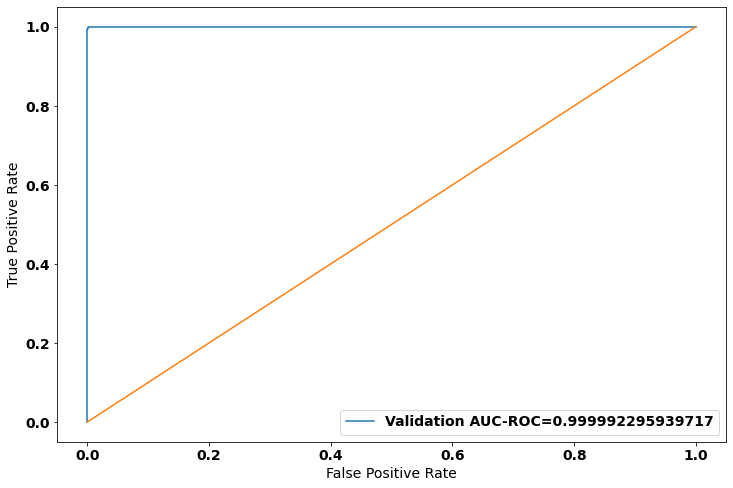

In [ ]:
fpr, tpr, _ = roc_curve(y_test2,pred2) 
auc = roc_auc_score(y_test2, pred2) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [ ]:
# Confusion Matrix
pred_val2 = clf2.predict(X_test2)

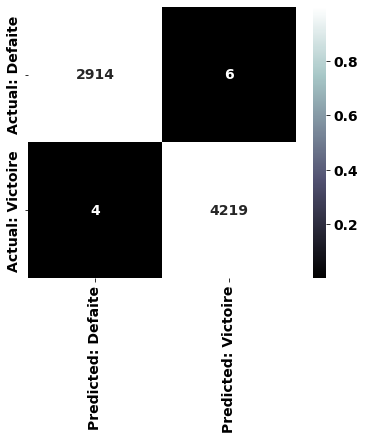

In [ ]:
label_preds2 = pred_val2
cm2 = confusion_matrix(y_test2,label_preds2)
plot_confusion_matrix(cm2, ['Defaite', 'Victoire'])

In [ ]:
# TESTS AUTRES ALGORITHMES + TESTER EN RETIRANT LA VARIABLE "TEAM_WINS_LOSSES_HOME"